In [83]:
import numpy as np
from scipy.sparse import csr_matrix,csc_matrix,save_npz,load_npz,coo_matrix, vstack
import sys
from tqdm import tqdm
import h5py
import os
import matplotlib.pyplot as plt

# Load Dataset

In [226]:
DataPath = '/home/invites/jmorlot/HDD/Datasets/DNASE_Binary_Peak_Caller/'
f = h5py.File(DataPath+'Cleaned_DNAse_Dataset.hdf5','r')
matrix = np.array(f['matrix']) 
labels = np.array(f['labels']) 
namesCT = np.array(f['namesCT']) 
names = np.array(f['names'])
f.close()

In [195]:
data_path = '/home/invites/jmorlot/HDD/Datasets/DNASE_Binary_Peak_Caller/'
matrixSp = load_npz(data_path+'sparseMATRIXRaw_DNASE_PeakC_200bp.npz')
matrixSp = matrixSp.tocsr()[:,:1000000]
namesCT = np.load(data_path+'DNASERaw_names_CT.npy')
names = np.load(data_path+'DNASERaw_names.npy')
labels = np.load(data_path+'DNASERaw_labels.npy')

In [196]:
s = np.sum(matrixSp.tocsc(),axis=0)
idx1 = np.where(s>0)[1]
print len(idx1)
matrix = matrixSp[:,idx1].toarray()

285690


In [197]:
Names_Roadmap = [ 'Fetal_Intestine_Large',
'Breast_vHMEC',
'CD4_Primary_Cells',
'CD20_Primary_Cells',
'Fetal_Brain',
'Fetal_Intestine_Small',
'Fetal_Kidney',
'CD8_Primary_Cells',
'CD56_Primary_Cells',
'CD3_Primary_Cells',
'Fetal_Adrenal_Gland',
'CD14_Primary_Cells',
'Fetal_Kidney_Left',
'CD19_Primary_Cells',
'Fetal_Kidney_Right',
'Fetal_Lung',
'Fetal_Lung_Left',
'Fetal_Lung_Right',
'Fetal_Muscle_Arm',
'Fetal_Muscle_Back',
'Fetal_Muscle_Leg',
'Fetal_Muscle_Lower_Limb_Skeletal',
'Fetal_Placenta',
'Fetal_Renal_Cortex',
'Fetal_Muscle_Trunk',
'Fetal_Renal_Cortex_Right',
'Fetal_Renal_Pelvis',
'Fetal_Renal_Pelvis_Right',
'Fetal_Stomach',
'Fetal_Thymus',
'Fibroblasts_Fetal_Skin_Back',
'Fetal_Skin',
'Fetal_Muscle_Upper_Limb_Skeletal',
'Fetal_Spinal_Cord',
'Fetal_Muscle_Upper_Trunk',
'Fibroblasts_Fetal_Skin_Biceps_Left',
'Fetal_Renal_Cortex_Left',
'Fetal_Ovary',
'Fibroblasts_Fetal_Skin_Biceps_Right',
'Fetal_Testes',
'Fibroblasts_Fetal_Skin_Quadriceps_Left',
'Fibroblasts_Fetal_Skin_Scalp',
'H1_BMP4_Derived_Mesendoderm_Cultured_Cells',
'Fetal_Spleen',
'H1_BMP4_Derived_Trophoblast_Cultured_Cells',
'Fibroblasts_Fetal_Skin_Quadriceps_Right',
'Mobilized_CD34_Primary_Cells',
'Fibroblasts_Fetal_Skin_Upper_Back',
'Penis_Foreskin_Fibroblast_Primary_Cells',
'Fibroblasts_Fetal_Skin_Abdomen',
'Penis_Foreskin_Melanocyte_Primary_Cells',
'H1_Derived_Mesenchymal_Stem_Cells',
'Gastric',
'Penis_Foreskin_Keratinocyte_Primary_Cells',
'Mobilized_CD3_Primary_Cells',
'Psoas_Muscle',
'H1_Derived_Neuronal_Progenitor_Cultured_Cells',
'H1',
'Small_Intestine',
'Mobilized_CD56_Primary_Cells',
'Mobilized_CD4_Primary_Cells',
'iPS_DF_4.7',
'H9',
'iPS_DF_6.9',
'Ovary',
'iPS_DF_19.7',
'Pancreas',
'Mobilized_CD8_Primary_Cells',
'Heart',
'iPS_DF_19.11',
'IMR90',
'Fetal_Heart',
'Fetal_Renal_Pelvis_Left']

In [198]:
import re
names = np.array([re.sub('(Raw)?(Rep\d)?(.filt)?','',n) for n in names])
_,index = np.unique(labels,return_index=True)
namesCT = names[index]

print namesCT
print names


['A549' 'Wi38' 'Ag04449' 'Hbvsmc' 'Ag04450' 'Ag09309' 'Ag09319' 'Ag10803'
 'Aoaf' 'Hpf' 'Monocd14ro1746' 'H7esDiffa14d' 'Caco2' 'Gm06990' 'Hae'
 'Cd34mobilized' 'Hbmec' 'Gm12878' 'Hcf' 'Hconf' 'Cmk' 'H1hesc' 'Hcfaa'
 'Hcpe' 'Cd4naivewb11970640' 'Hah' 'Be2c' 'Gm12864' 'Gm04503' 'H7esDiffa2d'
 'H7es' 'Hbvp' 'Cd4naivewb78495824' 'Gm12865' 'Hct116' 'H7esDiffa5d' 'Hcm'
 'Gm04504' 'Cd20ro01778' 'Hasp' 'Hac' 'Bj' 'Hee' 'Hff' 'H7esDiffa9d' 'Hipe'
 'Helas3' 'Hmf' 'Hmvecdblneo' 'Hmvecdneo' 'Hnpce' 'Hffmyc' 'Hrgec'
 'Hmvecdad' 'Hl60' 'Hsmm' 'Hepg2' 'Hpaec' 'Hrce' 'Hmvecdlyad' 'Hmveclbl'
 'Hgf' 'Hrpe' 'Hpaf' 'Hmec' 'Hmvecdblad' 'Hre' 'Hsmmt' 'Hmvecdlyneo' 'Hvmf'
 'Hs5' 'Hpdlf' 'Hmveclly' 'Huvec' 'K562Znf2c10c5' 'Hs27a' 'K562Znfa41c6'
 'Jurkat' 'K562Znff41b2' 'Lhcnm2Diff4d' 'M059j' 'Mcf7' 'K562Znf4c50c4'
 'K562Znfg54a11' 'Msc' 'Nhbera' 'Nhek' 'K562Znfb34a8' 'Lhcnm2' 'K562'
 'Mcf7Est100nm1h' 'Nb4' 'Monocd14' 'K562Znf4g7d3' 'K562Znfp5' 'Lncap'
 'K562Znfe103c6' 'Nhdfad' 'Nhlf' 'Panc1' 'Rptec' 'Sknmc' 

In [199]:
idx = np.hstack([np.sort(np.hstack([np.where(names==n)[0] for n in Names_Roadmap])),np.sort(np.hstack([np.where(names==n)[0] for n in namesCT if n not in Names_Roadmap]))])
#idx = np.sort(np.hstack([np.where(names==n)[0] for n in Names_Roadmap]))
#idx = np.sort(np.hstack([np.where(names==n)[0] for n in namesCT if n not in Names_Roadmap]))

matrix = matrix[idx,:]
labels = labels[idx]
names = names[idx]
namesCT = namesCT[np.unique(labels)]

labels_tmp = labels.copy()
for i,l in enumerate(np.unique(labels)):
    labels_tmp[labels==l] = i
labels = labels_tmp

In [232]:
lU,counts = np.unique(labels,return_counts=True)
lU = lU[counts>1]
idx = np.hstack([np.where(labels==l)[0] for l in lU])

matrix = matrix[idx,:]
labels = labels[idx]
names = names[idx]
namesCT = np.hstack([names[np.where(labels==l)[0][0]] for l in lU])

labels_tmp = labels.copy()
for i,l in enumerate(np.unique(labels)):
    labels_tmp[labels==l] = i
labels = labels_tmp

In [233]:
idx = np.where(matrix.sum(axis=1)>0)[0]

matrix = matrix[idx,:]
labels = labels[idx]
names = names[idx]
namesCT = namesCT[np.unique(labels)]

labels_tmp = labels.copy()
for i,l in enumerate(np.unique(labels)):
    labels_tmp[labels==l] = i
labels = labels_tmp

In [202]:
#Reorder the labels
labels_tmp = labels.copy()
namesCT_tmp = namesCT.copy()

lU,idx = np.unique(labels,return_index=True)
idxU = np.argsort(idx)

for i,l in enumerate(lU[idxU]):
    labels_tmp[labels==l]=i
    namesCT_tmp[l] = namesCT[i]

labels = labels_tmp
namesCT = namesCT_tmp

In [234]:
for i,n in enumerate(namesCT):
    print i,n

0 Breast_vHMEC
1 CD4_Primary_Cells
2 Fetal_Brain
3 Fetal_Intestine_Small
4 Fetal_Kidney
5 CD8_Primary_Cells
6 CD56_Primary_Cells
7 CD3_Primary_Cells
8 Fetal_Adrenal_Gland
9 CD14_Primary_Cells
10 Fetal_Kidney_Left
11 CD19_Primary_Cells
12 Fetal_Kidney_Right
13 Fetal_Lung
14 Fetal_Lung_Left
15 Fetal_Lung_Right
16 Fetal_Muscle_Arm
17 Fetal_Muscle_Back
18 Fetal_Muscle_Leg
19 Fetal_Placenta
20 Fetal_Renal_Cortex
21 Fetal_Muscle_Trunk
22 Fetal_Renal_Cortex_Right
23 Fetal_Renal_Pelvis
24 Fetal_Renal_Pelvis_Right
25 Fetal_Stomach
26 Fetal_Thymus
27 Fibroblasts_Fetal_Skin_Back
28 Fetal_Spinal_Cord
29 Fibroblasts_Fetal_Skin_Biceps_Left
30 Fetal_Renal_Cortex_Left
31 Fibroblasts_Fetal_Skin_Biceps_Right
32 Fetal_Testes
33 Fibroblasts_Fetal_Skin_Quadriceps_Left
34 Fibroblasts_Fetal_Skin_Scalp
35 H1_BMP4_Derived_Mesendoderm_Cultured_Cells
36 H1_BMP4_Derived_Trophoblast_Cultured_Cells
37 Fibroblasts_Fetal_Skin_Quadriceps_Right
38 Mobilized_CD34_Primary_Cells
39 Fibroblasts_Fetal_Skin_Upper_Back
40 Pen

In [235]:
for i,nCT in enumerate(namesCT):
    print '\n' + nCT +" "+ str(np.sum(labels==i))
    for l,n in zip(labels[labels==i],names[labels==i]):
        print l,n


Breast_vHMEC 2
0 Breast_vHMEC
0 Breast_vHMEC

CD4_Primary_Cells 4
1 CD4_Primary_Cells
1 CD4_Primary_Cells
1 CD4_Primary_Cells
1 CD4_Primary_Cells

Fetal_Brain 24
2 Fetal_Brain
2 Fetal_Brain
2 Fetal_Brain
2 Fetal_Brain
2 Fetal_Brain
2 Fetal_Brain
2 Fetal_Brain
2 Fetal_Brain
2 Fetal_Brain
2 Fetal_Brain
2 Fetal_Brain
2 Fetal_Brain
2 Fetal_Brain
2 Fetal_Heart
2 Fetal_Heart
2 Fetal_Heart
2 Fetal_Heart
2 Fetal_Heart
2 Fetal_Heart
2 Fetal_Heart
2 Fetal_Heart
2 Fetal_Heart
2 Fetal_Heart
2 Fetal_Heart

Fetal_Intestine_Small 13
3 Fetal_Intestine_Small
3 Fetal_Intestine_Small
3 Fetal_Intestine_Small
3 Fetal_Intestine_Small
3 Fetal_Intestine_Small
3 Fetal_Intestine_Small
3 Fetal_Intestine_Small
3 Fetal_Intestine_Small
3 Fetal_Intestine_Small
3 Fetal_Intestine_Small
3 Fetal_Intestine_Small
3 Fetal_Intestine_Small
3 Fetal_Intestine_Small

Fetal_Kidney 10
4 Fetal_Kidney
4 Fetal_Kidney
4 Fetal_Kidney
4 Fetal_Kidney
4 Fetal_Kidney
4 Fetal_Kidney
4 Fetal_Kidney
4 Fetal_Kidney
4 Fetal_Kidney
4 Fetal_Kid

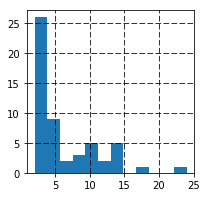

In [236]:
_,c = np.unique(labels,return_counts=True)

plt.figure(figsize=(3,3))
plt.hist(c,12)
plt.grid(color='k',linestyle='--')
plt.savefig('histogram_number_replicates_per_CT.png',dpi=300)
plt.show()

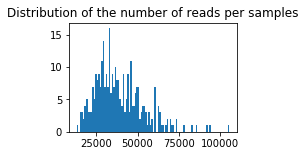

In [237]:
plt.figure(figsize=(3,2))
plt.hist(matrix.sum(axis=1),100)
plt.title('Distribution of the number of reads per samples')
plt.savefig('histogram_homo_binary.png',dpi=300)
plt.show()

In [238]:
matrix.sum(axis=1).max()

105310.0

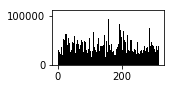

In [239]:
plt.figure(figsize=(2,1))
plt.bar(np.arange(matrix.shape[0])[::-1],matrix.sum(axis=1),1,color='k')
plt.savefig('plot_sum_homo_binary.png',dpi=300)
plt.show()

In [240]:
for i,n in enumerate(names):
    print len(names)-i,n

315 Breast_vHMEC
314 Breast_vHMEC
313 CD4_Primary_Cells
312 CD4_Primary_Cells
311 CD4_Primary_Cells
310 CD4_Primary_Cells
309 Fetal_Brain
308 Fetal_Brain
307 Fetal_Brain
306 Fetal_Brain
305 Fetal_Brain
304 Fetal_Brain
303 Fetal_Brain
302 Fetal_Brain
301 Fetal_Brain
300 Fetal_Brain
299 Fetal_Brain
298 Fetal_Brain
297 Fetal_Brain
296 Fetal_Heart
295 Fetal_Heart
294 Fetal_Heart
293 Fetal_Heart
292 Fetal_Heart
291 Fetal_Heart
290 Fetal_Heart
289 Fetal_Heart
288 Fetal_Heart
287 Fetal_Heart
286 Fetal_Heart
285 Fetal_Intestine_Small
284 Fetal_Intestine_Small
283 Fetal_Intestine_Small
282 Fetal_Intestine_Small
281 Fetal_Intestine_Small
280 Fetal_Intestine_Small
279 Fetal_Intestine_Small
278 Fetal_Intestine_Small
277 Fetal_Intestine_Small
276 Fetal_Intestine_Small
275 Fetal_Intestine_Small
274 Fetal_Intestine_Small
273 Fetal_Intestine_Small
272 Fetal_Kidney
271 Fetal_Kidney
270 Fetal_Kidney
269 Fetal_Kidney
268 Fetal_Kidney
267 Fetal_Kidney
266 Fetal_Kidney
265 Fetal_Kidney
264 Fetal_Kidney
263

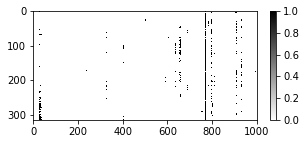

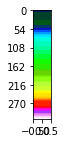

In [241]:
plt.figure(figsize=(5,2))
plt.imshow(matrix[:,1100:2100],aspect='auto',cmap='gray_r')
plt.colorbar()
plt.savefig('DNASE_binary_matrix_homo.png',dpi=300)
plt.show()

plt.figure(figsize=(5,2))
plt.imshow(labels[:,None],aspect=0.02,cmap='gist_ncar')
plt.yticks(np.arange(0,matrix.shape[0]+1,labels.max()+1))
plt.savefig('DNASE_binary_matrix_colorbar_homo.png',dpi=300)
plt.show()


# NGS Quality Tester

In [242]:
sys.path.append('../')
import QualityTester as QT
reload(QT)

<module 'QualityTester' from '../QualityTester.pyc'>

In [179]:
reload(QT)
qt2 = QT.QualityTester()
qt2.__dict__ = qt.__dict__ 
qt = QT.QualityTester()
qt.__dict__  = qt2.__dict__

In [243]:
qt = QT.QualityTester()

Remove outliers defined by anomalous number of reads


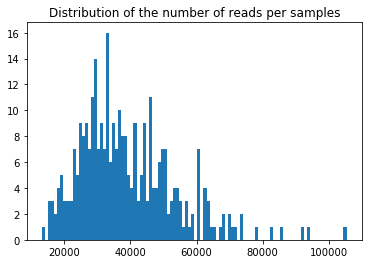

Lower threshold = 15147
Upper threshold = 85231
Number of removed samples = 5 / 315

Testing all distances:

None
	Chebyshev
		None
			Connectivity: 0.0278078643748
			Silhouette: 0.0
	Sokal Michener
		None
			Connectivity: 0.472568872145
			Silhouette: 0.0243494266183
	Pearson
		None
			Connectivity: 0.504874028726
			Silhouette: 0.0663141171747
	Dice
		None
			Connectivity: 0.492041441017
			Silhouette: 0.0582836384517
	Canberra
		None
			Connectivity: 0.472568872145
			Silhouette: 0.0243072349481
	Jaccard
		None
			Connectivity: 0.492041441017
			Silhouette: 0.0480572333345
	Squared Euclidean
		None
			Connectivity: 0.0278078643748
Input contains NaN, infinity or a value too large for dtype('float64').
	Bray Curtis
		None
			Connectivity: 0.492041441017
			Silhouette: 0.0582836384517
	Spearman
		None
			Connectivity: 0.504874028726
			Silhouette: 0.0663141171747
	Yule
		None
			Connectivity: 0.506522251001
			Silhouette: 0.110985899254
	Euclidean
		None
			Connectivity: 0.4725688721

In [245]:
qt.get_optimal_distance(matrix,labels)

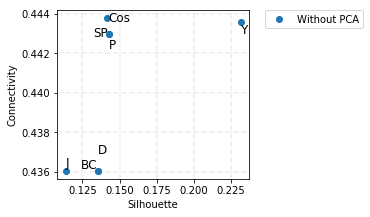

In [212]:
qt.displayNamesScatter(Suffix='_DNASeBinary_hetero_NOPCA',ImgSize=3.1,numdisplay=7,dispNoPCA=True,dispPCA=False)

In [213]:
qt.WriteDistanceScore(Suffix='_DNASeBinary_hetero')

In [290]:
qt.Res['Silhouette']

{'None-Bray Curtis-Cosine Kernel': -0.088363622576673462,
 'None-Bray Curtis-Exponential Kernel': 0.033218906544655362,
 'None-Bray Curtis-None': 0.033655786010496049,
 'None-Bray Curtis-Sigmoid Kernel': -0.11445824328852064,
 'None-Canberra-Cosine Kernel': -0.088872996516171254,
 'None-Canberra-Exponential Kernel': 0.0,
 'None-Canberra-None': 0.011647565409232527,
 'None-Canberra-Sigmoid Kernel': -0.087868263083562409,
 'None-Chebyshev-Cosine Kernel': -0.08786471195207643,
 'None-Chebyshev-Exponential Kernel': -4.7281660385909885e-16,
 'None-Chebyshev-None': 0.0,
 'None-Chebyshev-Sigmoid Kernel': -0.10354495654146353,
 'None-City Block-Cosine Kernel': -0.088872996516171254,
 'None-City Block-Exponential Kernel': 0.0,
 'None-City Block-None': 0.011647565409232527,
 'None-City Block-Sigmoid Kernel': -0.087868263230124338,
 'None-Cosine-Cosine Kernel': -0.08837602439060642,
 'None-Cosine-Exponential Kernel': 0.038131967619152336,
 'None-Cosine-None': 0.03868569268769724,
 'None-Cosine-Si

In [ ]:
#Write the values to a text file
for Ikey in qt.Res.keys():
            qt.SortedPDKkey[Ikey] = qt.PDKkeys[np.argsort(rank[Ikey])]

Using Optimal (PCA,Distance,Kernel) = ('None', 'Yule', 'None')

# Dataset Total: 534
# Dataset Kept: 484 (90.6 %)
# Dataset Removed: 50 (9.4 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		2		6.93281085436		A549
1		2		6.18515248979		Wi38
2		2		6.96740701215		Ag04449
3		2		7.44204025302		Hbvsmc
4		2		6.31677729461		Ag04450
5		2		5.03159114981		Ag09309
6		2		5.96538668435		Ag09319
7		2		5.96041147576		Ag10803
8		2		6.24781045291		Aoaf
9		1		3.15581933544		Hpf
10		2		4.91380294101		Monocd14ro1746
11		2		7.30237939306		H7esDiffa14d
12		2		4.87470066786		Caco2
13		2		5.76843942105		Gm06990
14		2		7.91459656758		Hae
15		2		5.40746121861		Hbmec
16		1		1.91582323522		Gm12878
17		2		6.11160220903		Hcf
18		2		6.85701714122		Hconf
19		2		6.43739746772		Hcfaa
20		2		7.0720220586		Hcpe
21		2		4.72762228258		Hah
22		2		6.14066086901		Be2c
23		2		4.26242925833		Gm04503
24		1		3.04375344032		H7es
25		2		7.33750680073		Gm12865
26		2		7.66310987111		Hct116
27		2		5.12595769784		H7esDif

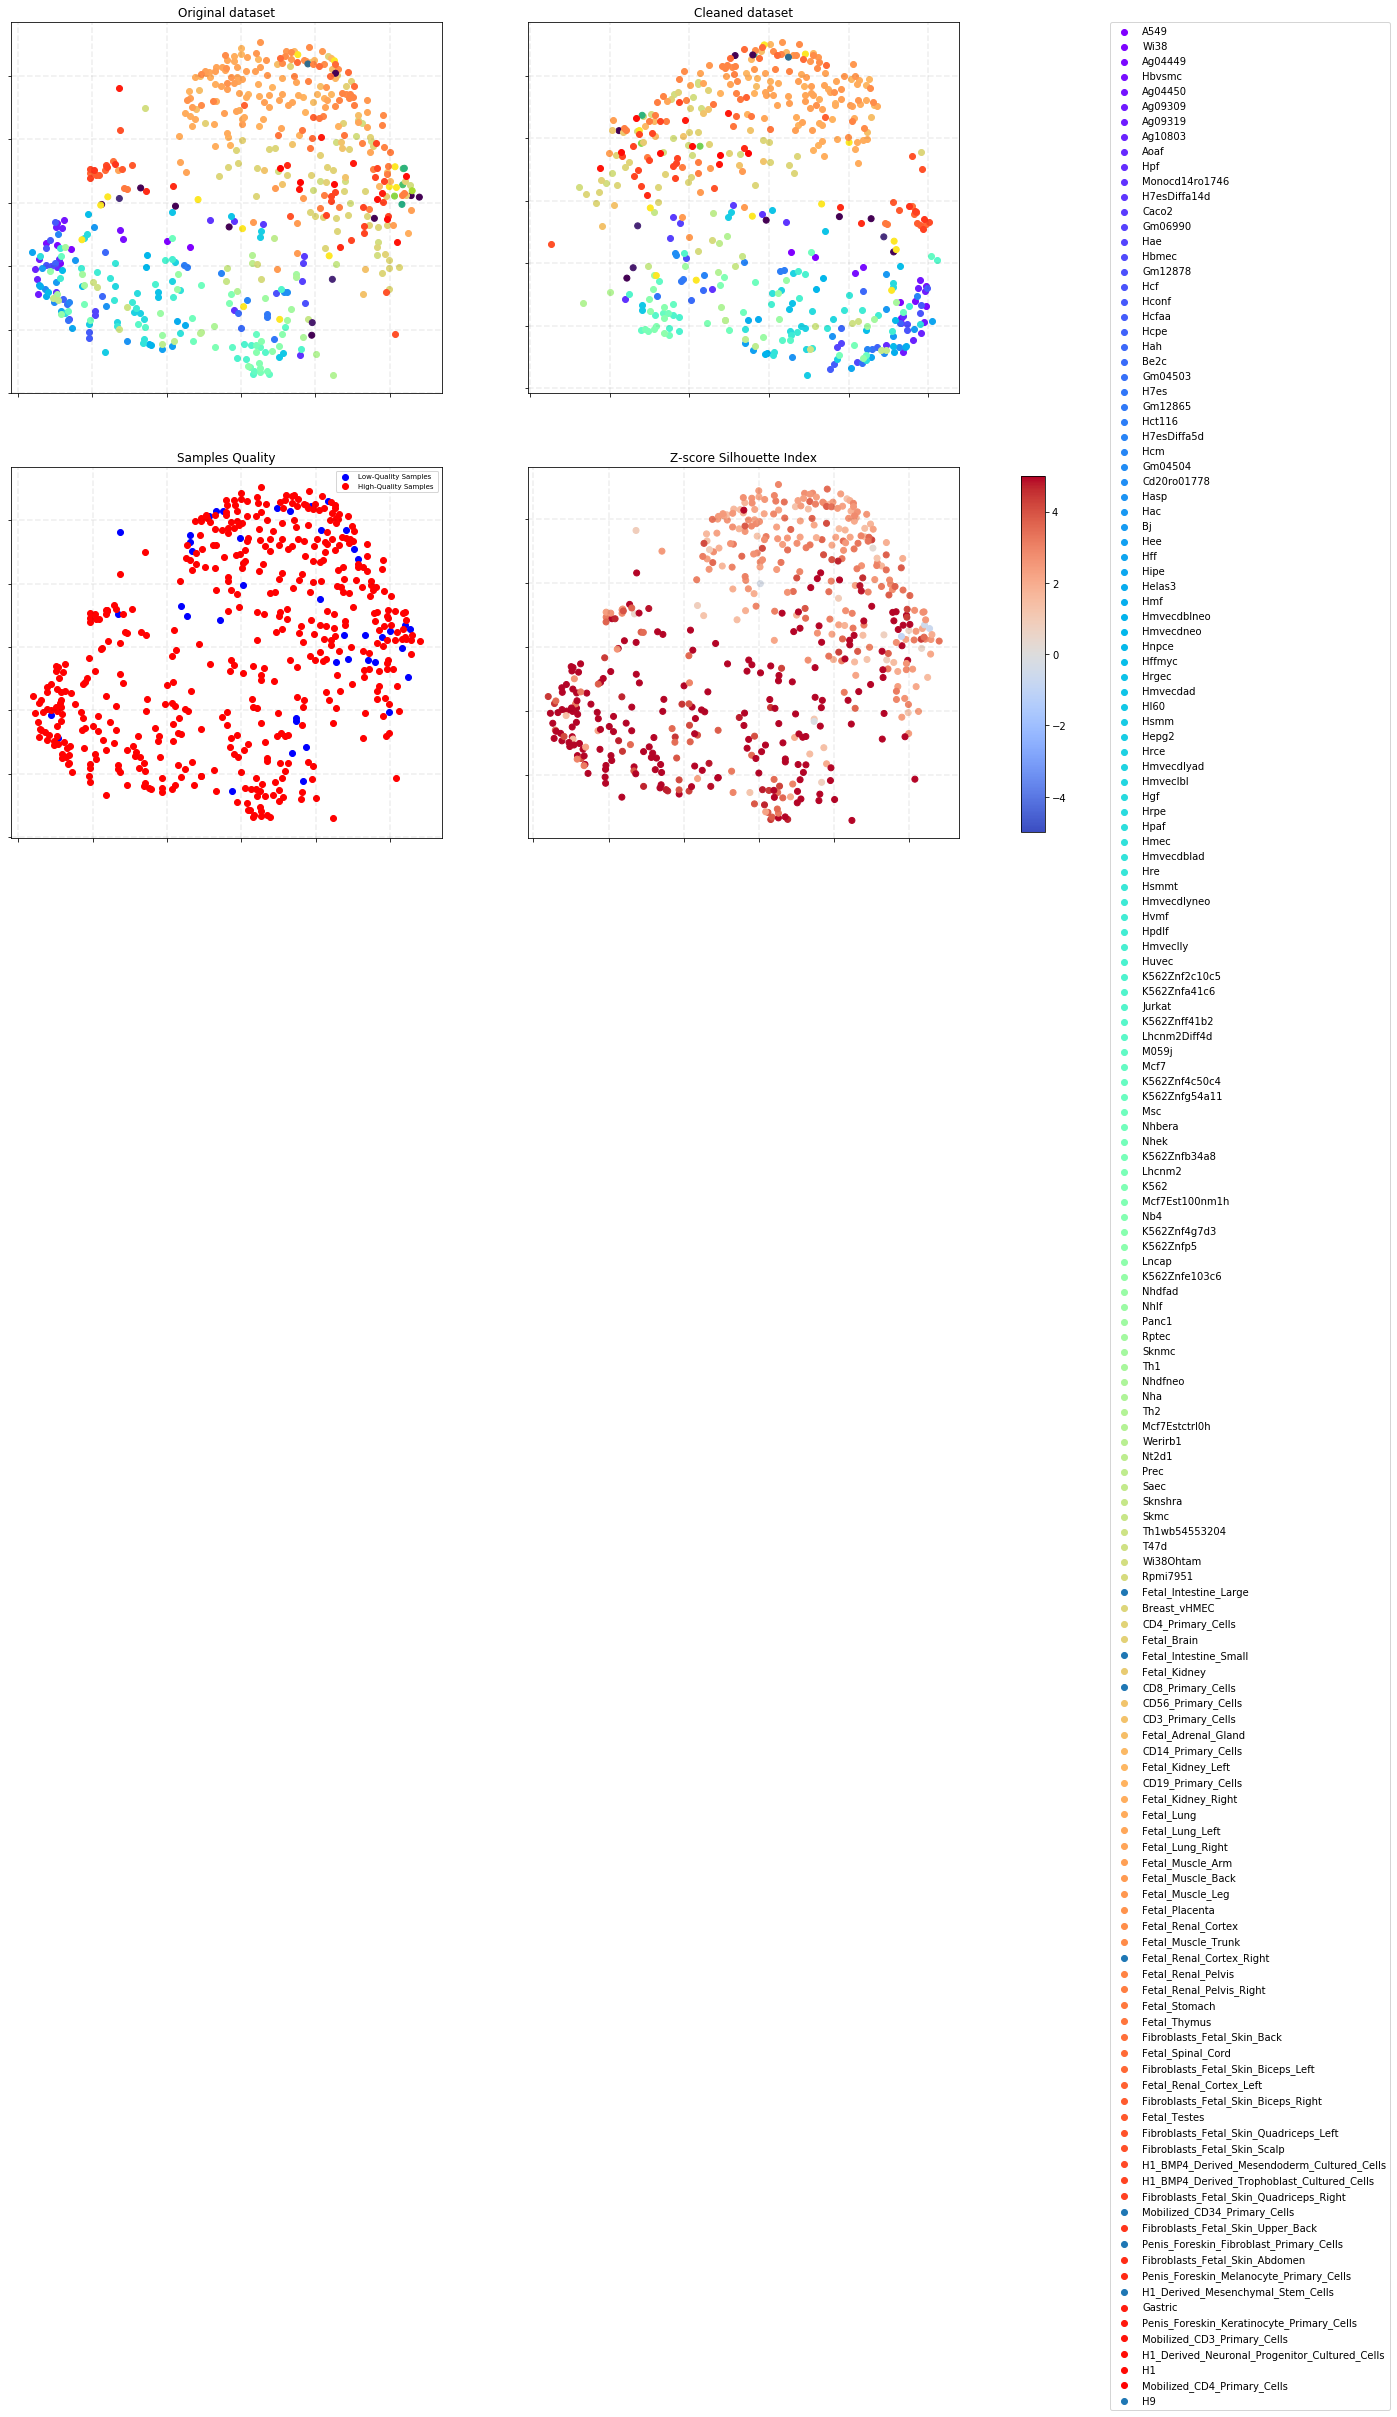

In [225]:
IdxGoodSamplesY = qt.compute_samples_quality(Tz=1.65,NR=100,names=namesCT)
qt.display_samples_quality(Suffix='_DNASeBinary_N-Y-N_MDS',DR='MDS',names=namesCT)
SilZY = qt.SilZ 

Computing Distance matrix


perplexities:   0%|          | 0/8 [00:00<?, ?it/s]


# Dataset Total: 534
# Dataset Kept: 492 (92.1 %)
# Dataset Removed: 42 (7.9 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		2		6.30574370574		A549
1		2		5.39473116982		Wi38
2		2		7.35102050435		Ag04449
3		2		7.69451188309		Hbvsmc
4		2		5.14282898857		Ag04450
5		2		5.32776603898		Ag09309
6		2		7.42049457249		Ag09319
7		2		6.21001225211		Ag10803
8		2		5.07112313637		Aoaf
9		1		3.05149117406		Hpf
10		2		4.82478155632		Monocd14ro1746
11		2		5.96377417486		H7esDiffa14d
12		2		4.99734855937		Caco2
13		2		6.18019287586		Gm06990
14		2		6.80420401417		Hae
15		2		6.26830642946		Hbmec
16		1		2.07779978381		Gm12878
17		2		5.23067490506		Hcf
18		2		6.77434238482		Hconf
19		2		7.07626269541		Hcfaa
20		2		6.33038754743		Hcpe
21		2		5.40650233628		Hah
22		2		7.94065094181		Be2c
23		2		4.24700579439		Gm04503
24		1		2.96914774801		H7es
25		2		7.56790071963		Gm12865
26		2		7.22396896841		Hct116
27		2		5.30143389782		H7esDiffa5d
28		2		2.28427827651		Hcm
29		2		4.9859726879		Gm04504
30


perplexities:  62%|██████▎   | 5/8 [03:47<02:16, 45.60s/it]/users/invites/jmorlot/anaconda2/lib/python2.7/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)

learning rates: 100%|██████████| 3/3 [10:25<00:00, 208.33s/it]


Optimal (learning rate,perplexity) = (1000,10)


learning rates: 100%|██████████| 3/3 [07:37<00:00, 152.39s/it]


Optimal (learning rate,perplexity) = (100,5)


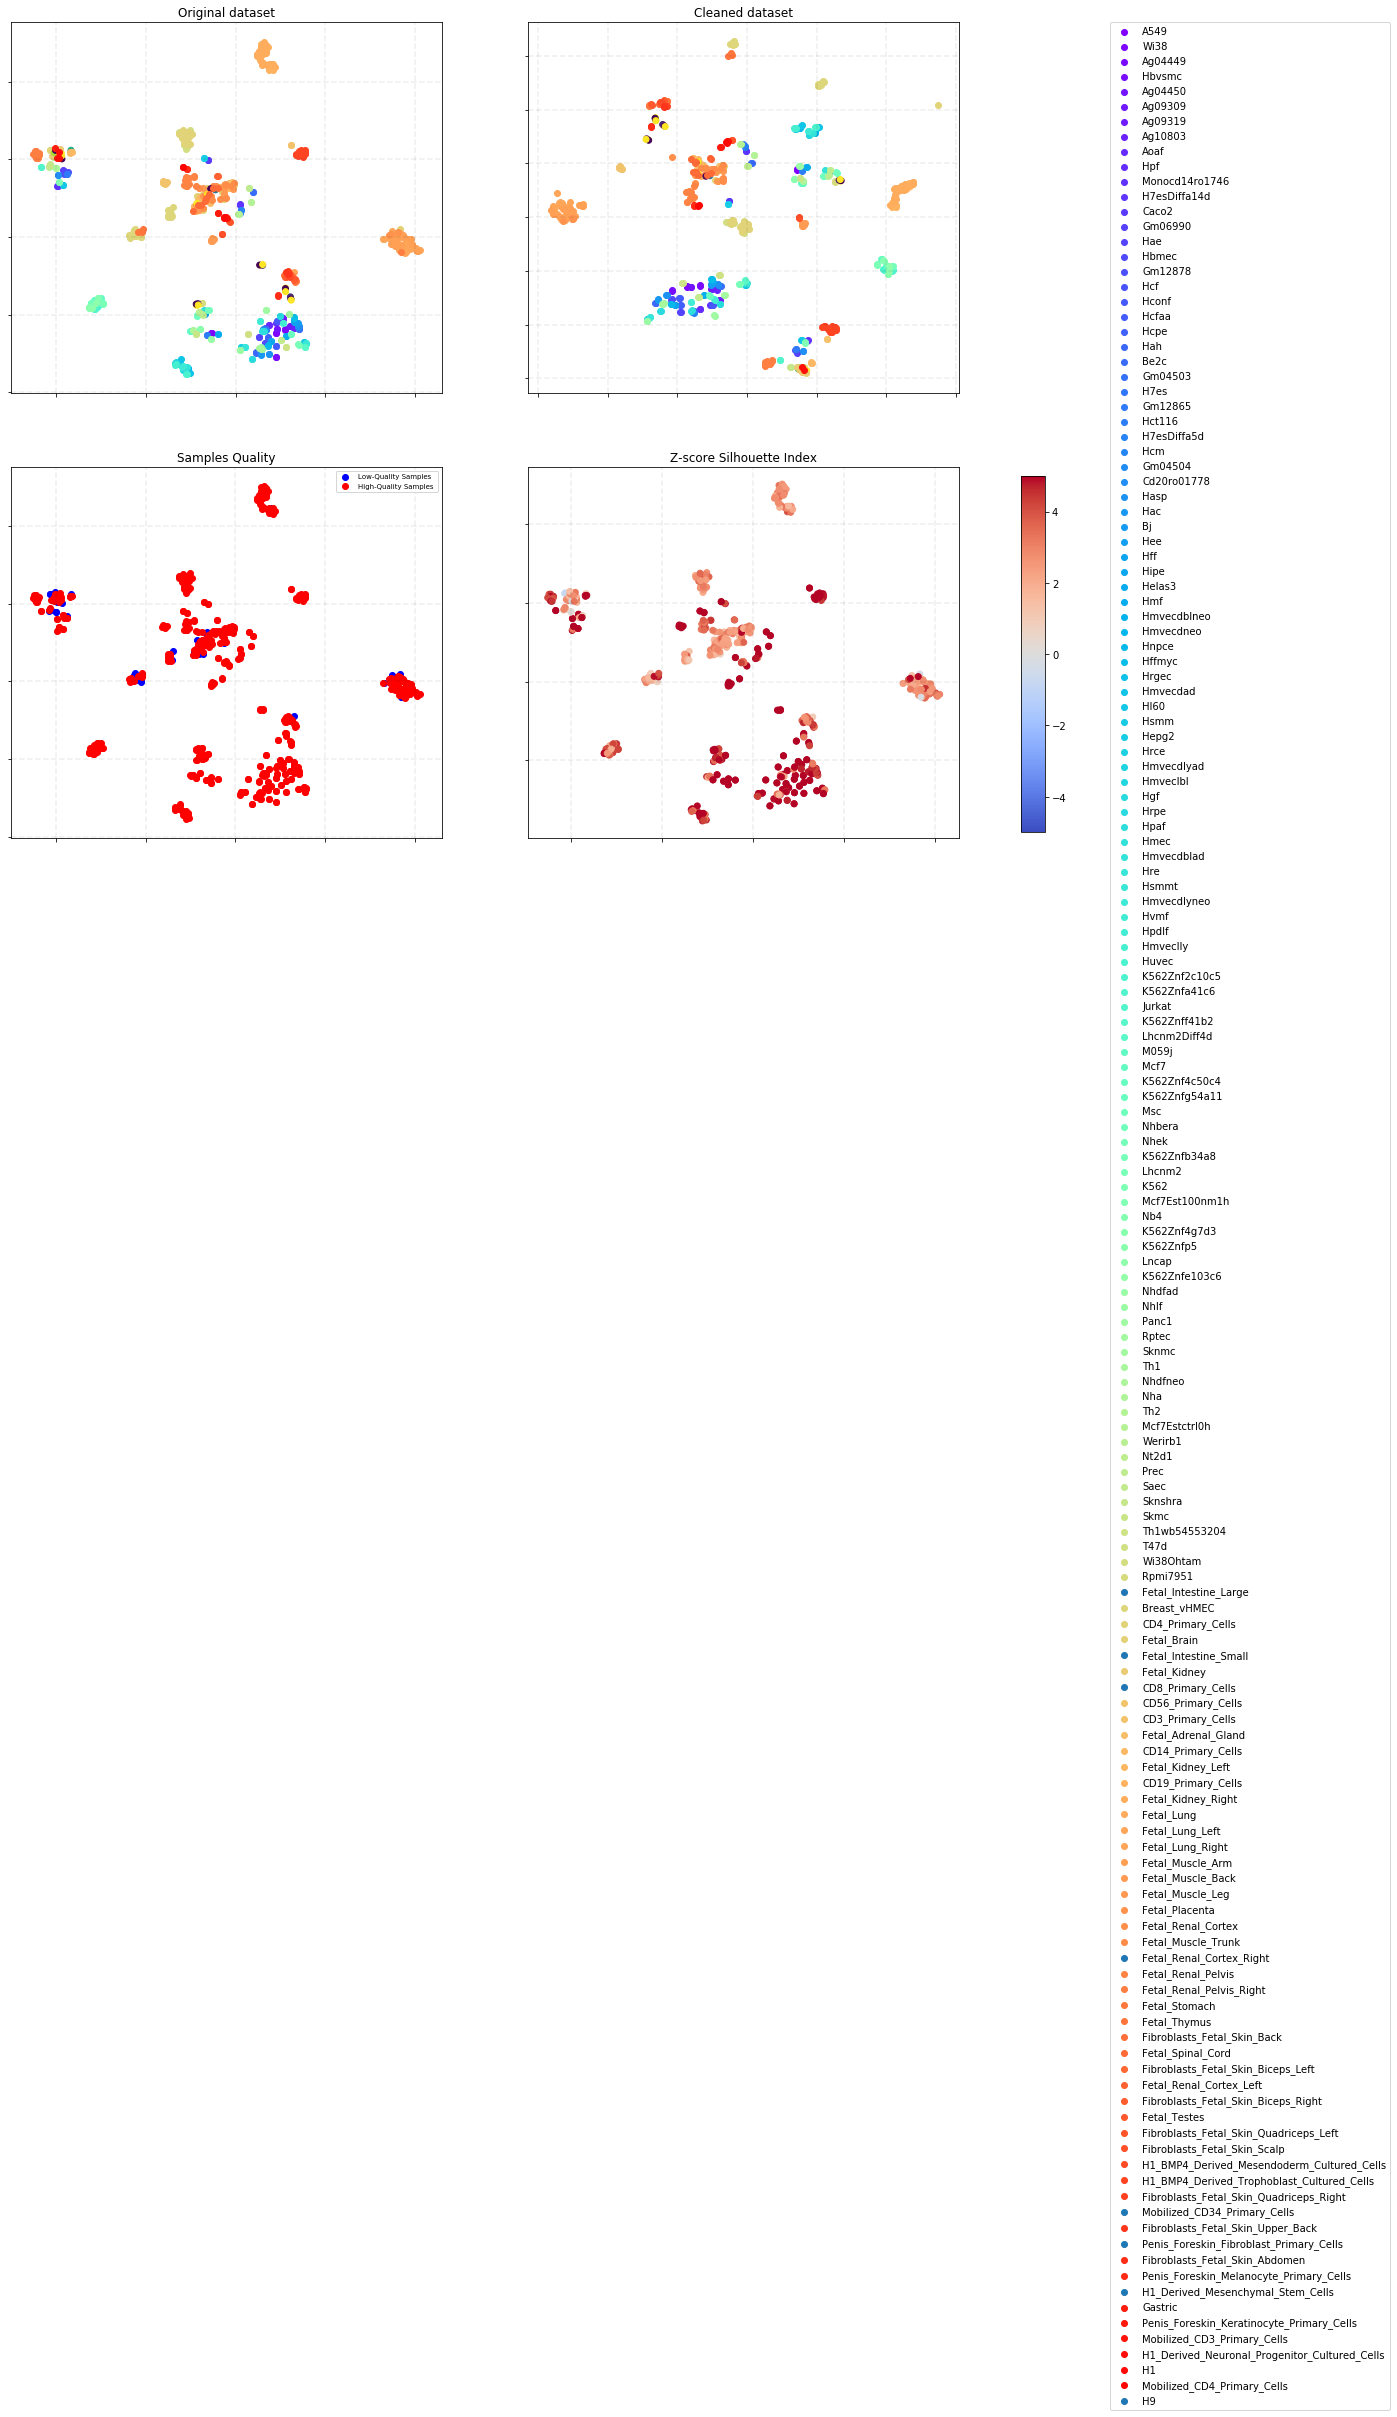

In [219]:
qt.compute_samples_quality(matrix,labels,Tz=1.65,NR=100,names=namesCT,PCA='None',Distance='Spearman',Kernel='None',return_Quality=False)
qt.display_samples_quality(Suffix='_DNASeBinary_N-SP-N_TSNE',DR='TSNE',names=namesCT)

Computing Distance matrix


perplexities:   0%|          | 0/8 [00:00<?, ?it/s]


# Dataset Total: 534
# Dataset Kept: 499 (93.4 %)
# Dataset Removed: 35 (6.6 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		2		7.11598725324		A549
1		2		5.98969434429		Wi38
2		2		6.58056858606		Ag04449
3		2		8.38370211577		Hbvsmc
4		2		7.81465993852		Ag04450
5		2		4.36077043023		Ag09309
6		2		7.28163901581		Ag09319
7		2		6.59535885227		Ag10803
8		2		7.11835694		Aoaf
9		1		3.43168108847		Hpf
10		2		4.14587547847		Monocd14ro1746
11		2		7.55042026851		H7esDiffa14d
12		2		4.7975832398		Caco2
13		2		8.15608680552		Gm06990
14		2		7.21449482732		Hae
15		2		5.27284265445		Hbmec
16		1		1.97610665554		Gm12878
17		2		4.04018152658		Hcf
18		2		6.09385853744		Hconf
19		2		6.90435507676		Hcfaa
20		2		5.89891163613		Hcpe
21		2		5.01123105901		Hah
22		2		6.40403437575		Be2c
23		2		4.07560210993		Gm04503
24		1		2.83940601153		H7es
25		2		8.58298204256		Gm12865
26		2		7.49042108973		Hct116
27		2		5.61718706806		H7esDiffa5d
28		2		2.33252291021		Hcm
29		2		4.69390698572		Gm04504
30		2


learning rates: 100%|██████████| 3/3 [10:42<00:00, 214.21s/it]


Optimal (learning rate,perplexity) = (1000,10)


learning rates: 100%|██████████| 3/3 [09:22<00:00, 187.62s/it]


Optimal (learning rate,perplexity) = (10,10)


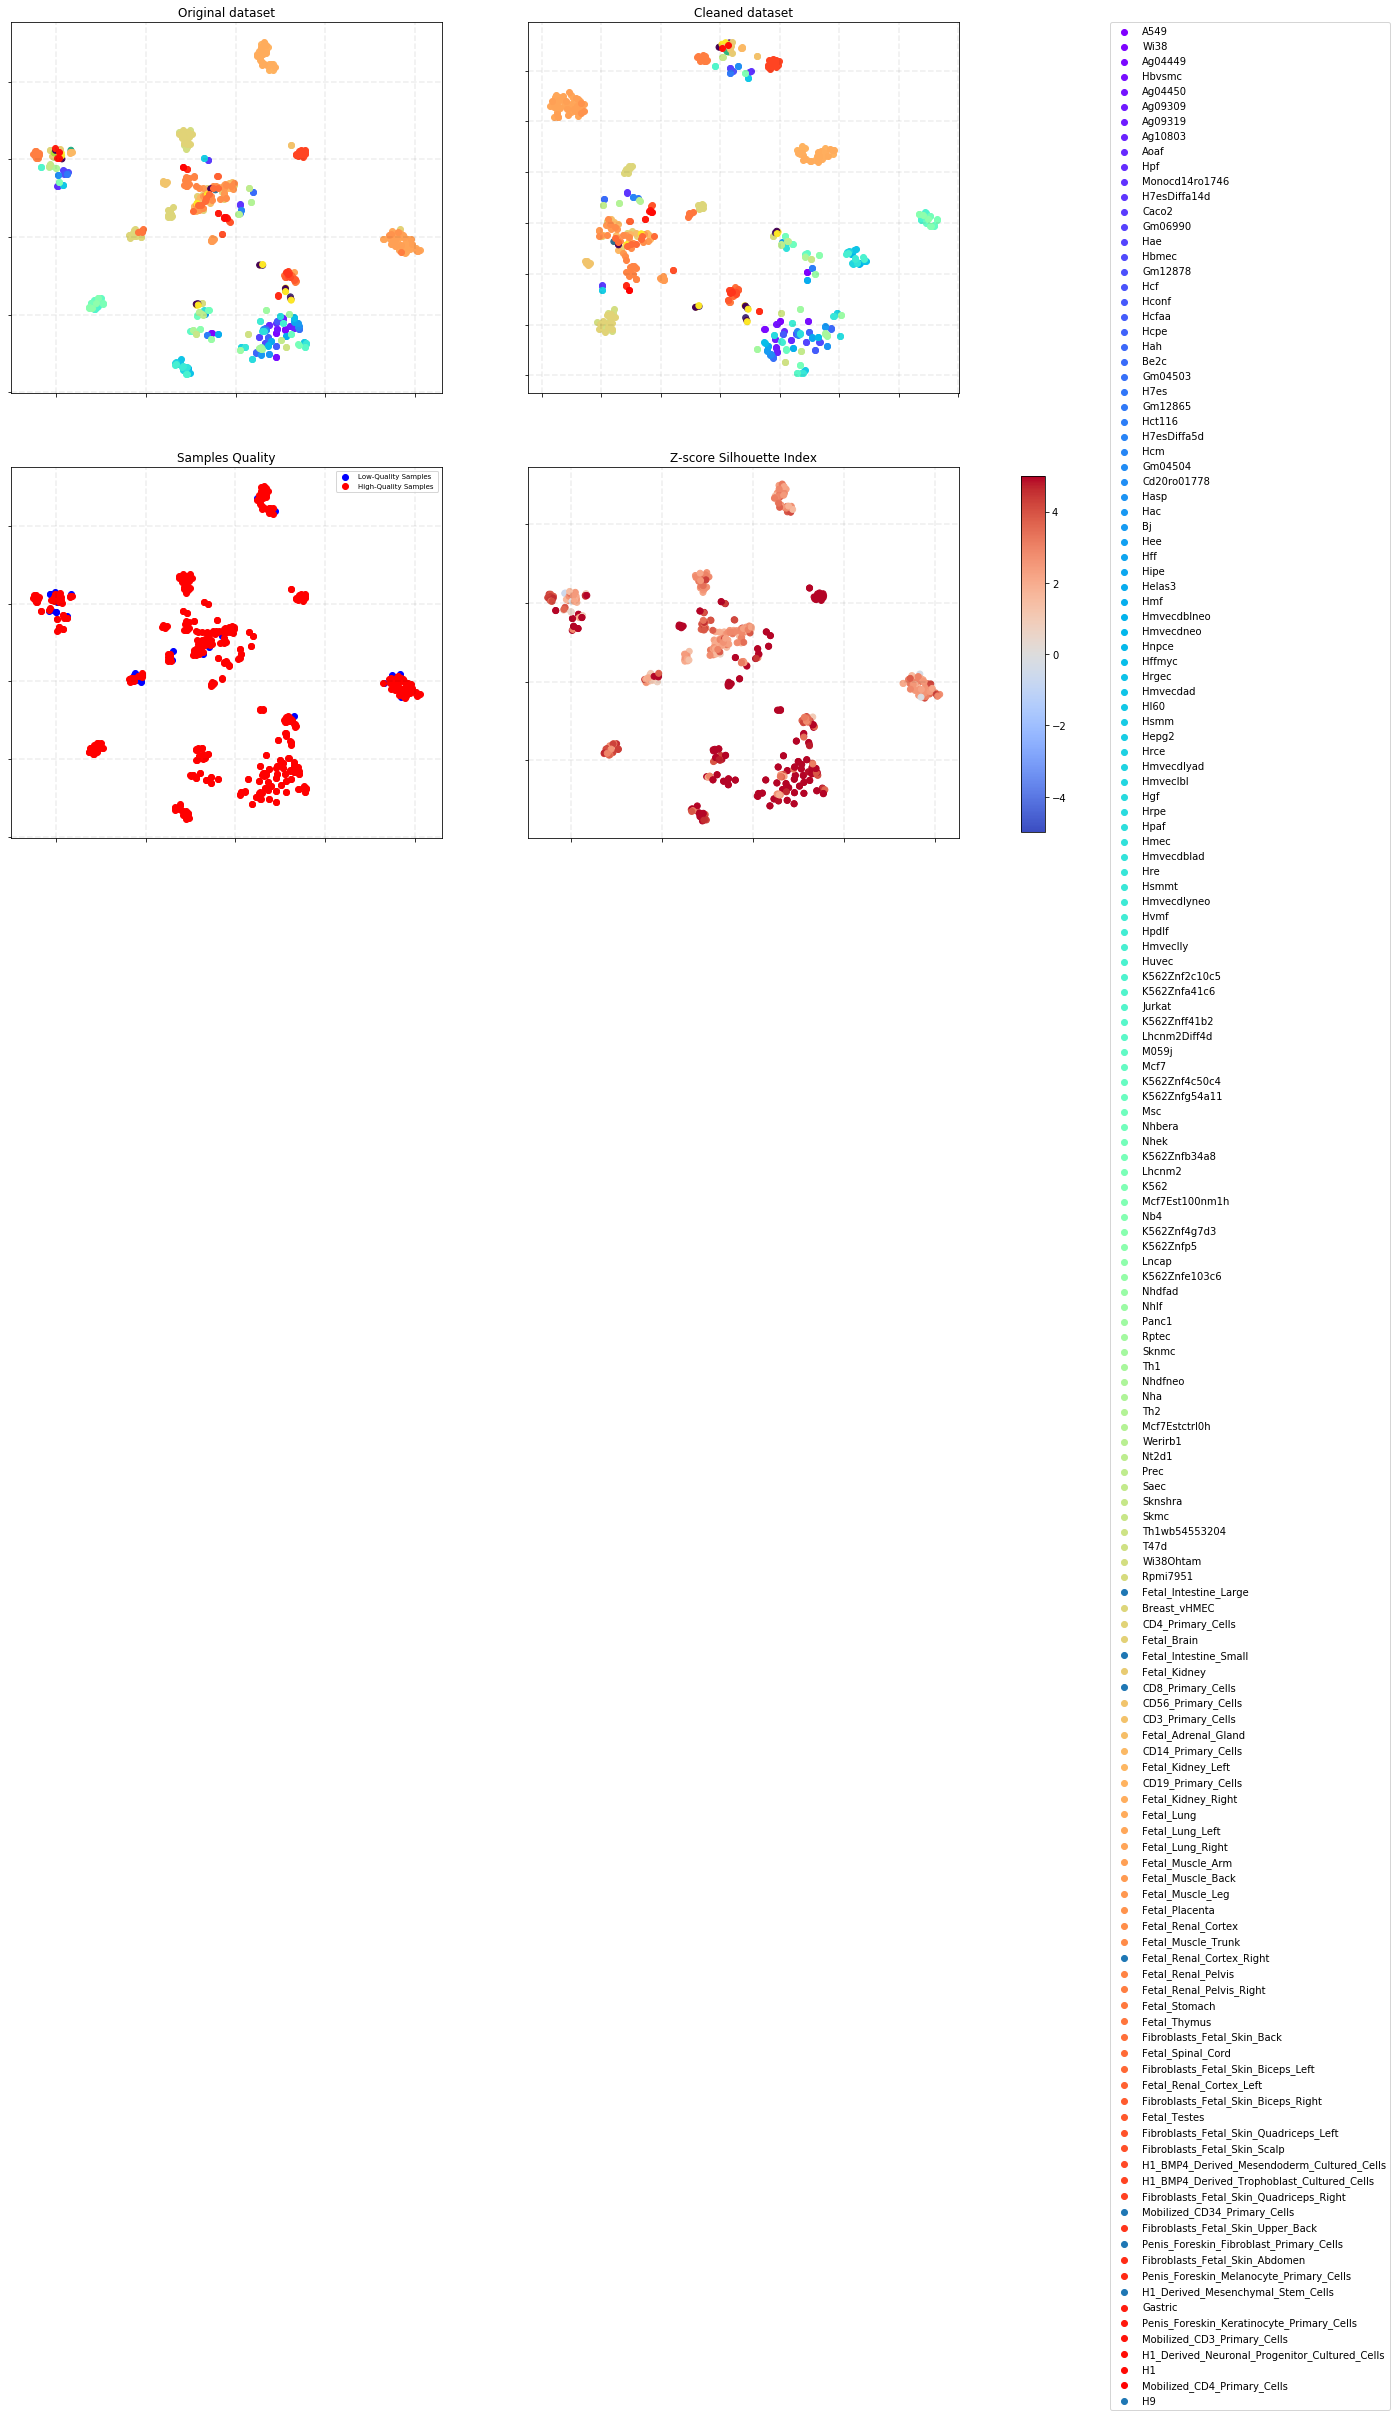

In [221]:
IdxGoodSamplesC = qt.compute_samples_quality(Tz=1.65,NR=100,names=namesCT,PCA='None',Distance='Pearson',Kernel='None')
qt.display_samples_quality(Suffix='_DNASeBinary_N-P-N_TSNE',DR='TSNE',names=namesCT)
SilZC = qt.SilZ 

Computing Distance matrix


perplexities:   0%|          | 0/8 [00:00<?, ?it/s]


# Dataset Total: 534
# Dataset Kept: 465 (87.1 %)
# Dataset Removed: 69 (12.9 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		2		5.69380069617		A549
1		2		5.77146931187		Wi38
2		2		5.22253528557		Ag04449
3		2		5.17496270635		Hbvsmc
4		2		5.75834930655		Ag04450
5		2		4.86401298922		Ag09309
6		2		5.27128198468		Ag09319
7		2		5.68742916774		Ag10803
8		2		6.5018119508		Aoaf
9		1		2.54459033292		Hpf
10		1		2.82413484986		Monocd14ro1746
11		2		3.69076335407		H7esDiffa14d
12		2		3.03348225147		Caco2
13		2		4.30152091771		Gm06990
14		2		7.50087502382		Hae
15		2		4.4606699926		Hbmec
17		2		6.09314548685		Hcf
18		2		6.43758434501		Hconf
19		2		5.49739259668		Hcfaa
20		2		6.07297462541		Hcpe
21		1		4.87764359458		Hah
22		2		6.122032627		Be2c
23		2		4.24784708015		Gm04503
24		1		2.02677878576		H7es
25		2		5.68909756002		Gm12865
26		2		5.49873222565		Hct116
27		2		2.51871663113		H7esDiffa5d
28		1		2.69880842802		Hcm
29		2		4.14347242764		Gm04504
30		2		4.94778554295		Cd20ro01778



learning rates: 100%|██████████| 3/3 [09:07<00:00, 182.59s/it]


Optimal (learning rate,perplexity) = (10,5)


learning rates: 100%|██████████| 3/3 [06:41<00:00, 133.79s/it]


Optimal (learning rate,perplexity) = (10,5)


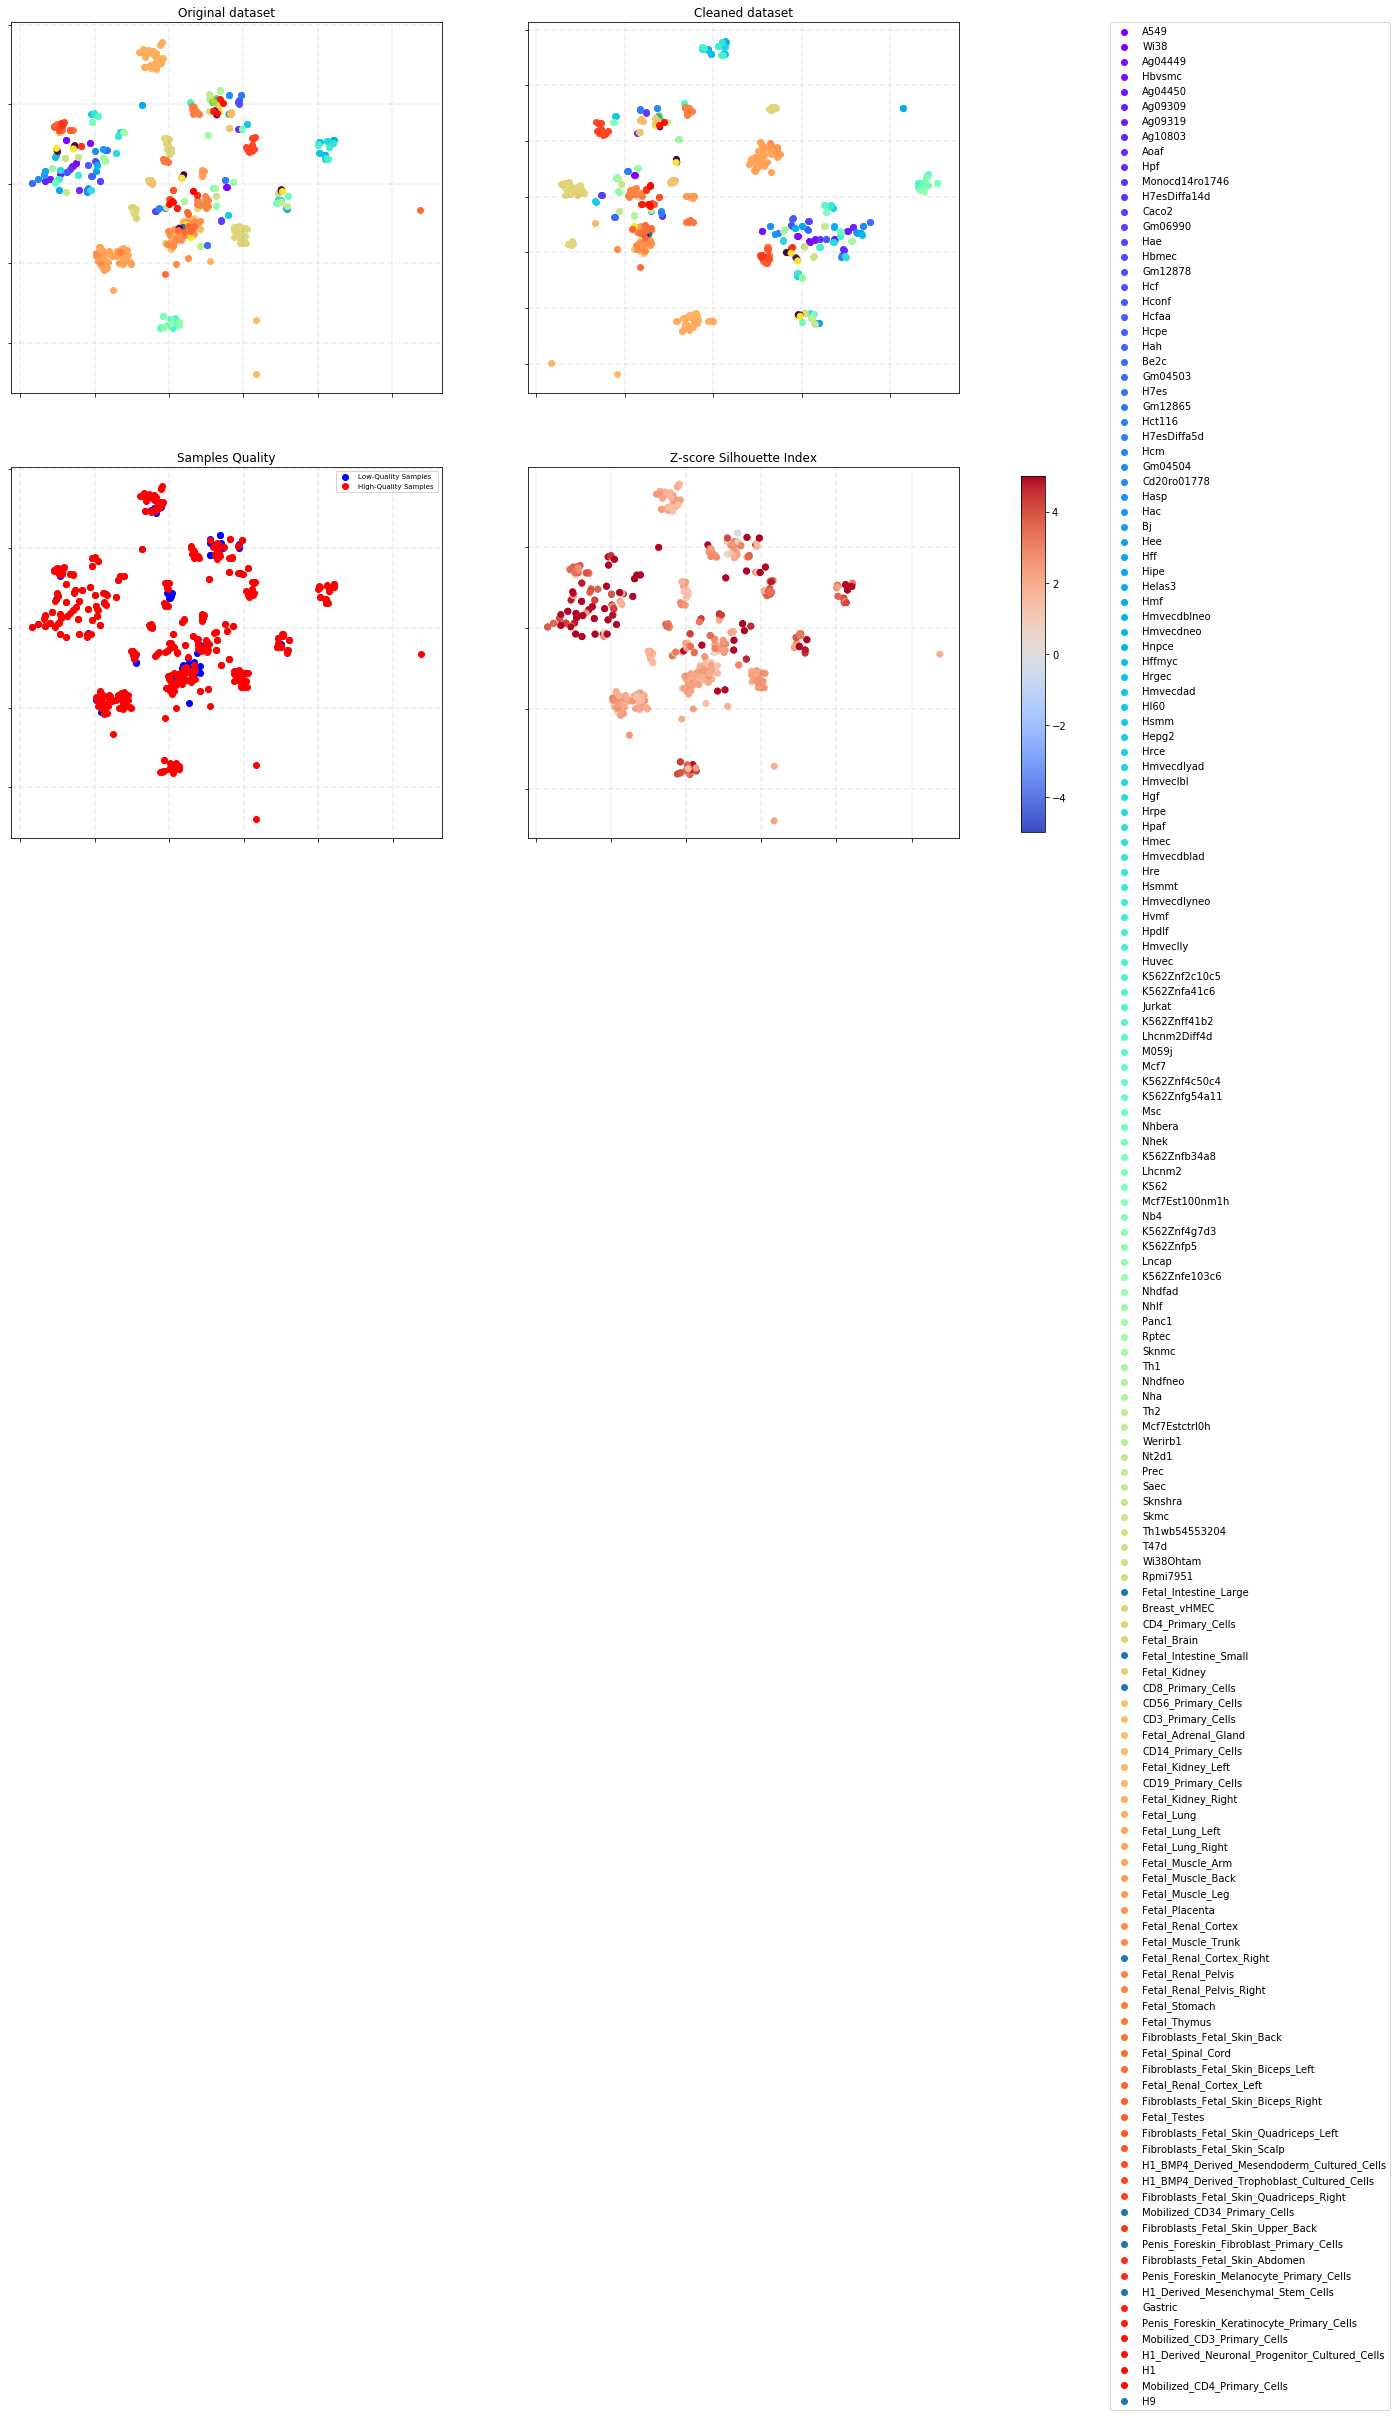

In [222]:
IdxGoodSamplesE = qt.compute_samples_quality(Tz=1.65,NR=100,names=namesCT,PCA='None',Distance='Euclidean',Kernel='None')
qt.display_samples_quality(Suffix='_DNASeBinary_N-E-N_TSNE',DR='TSNE',names=namesCT)
SilZE = qt.SilZ 

Computing Distance matrix


perplexities:   0%|          | 0/8 [00:00<?, ?it/s]


# Dataset Total: 534
# Dataset Kept: 489 (91.6 %)
# Dataset Removed: 45 (8.4 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		2		7.41762226234		A549
1		2		7.06573090803		Wi38
2		2		6.61961297684		Ag04449
3		2		7.15427076409		Hbvsmc
4		2		7.40076595146		Ag04450
5		2		5.12296957534		Ag09309
6		2		6.661215054		Ag09319
7		2		5.84382057607		Ag10803
8		2		5.65521843518		Aoaf
9		1		3.05506608101		Hpf
10		2		4.18292763675		Monocd14ro1746
11		2		7.71224581382		H7esDiffa14d
12		2		4.76546906929		Caco2
13		2		6.83752433281		Gm06990
14		2		8.40215555821		Hae
15		2		4.69258794835		Hbmec
16		1		1.95879892283		Gm12878
17		2		4.66709310977		Hcf
18		2		7.13001044777		Hconf
19		2		5.88768937072		Hcfaa
20		2		5.79744124048		Hcpe
21		2		4.67574169683		Hah
22		2		6.90191650216		Be2c
23		2		4.46603338602		Gm04503
24		1		2.55282269065		H7es
25		2		7.83788915403		Gm12865
26		2		6.91908148177		Hct116
27		2		5.08490147427		H7esDiffa5d
28		1		1.81375375519		Hcm
29		2		3.77807425908		Gm04504
30	


learning rates: 100%|██████████| 3/3 [11:33<00:00, 231.29s/it]


Optimal (learning rate,perplexity) = (1000,30)


learning rates: 100%|██████████| 3/3 [08:49<00:00, 176.54s/it]


Optimal (learning rate,perplexity) = (100,10)


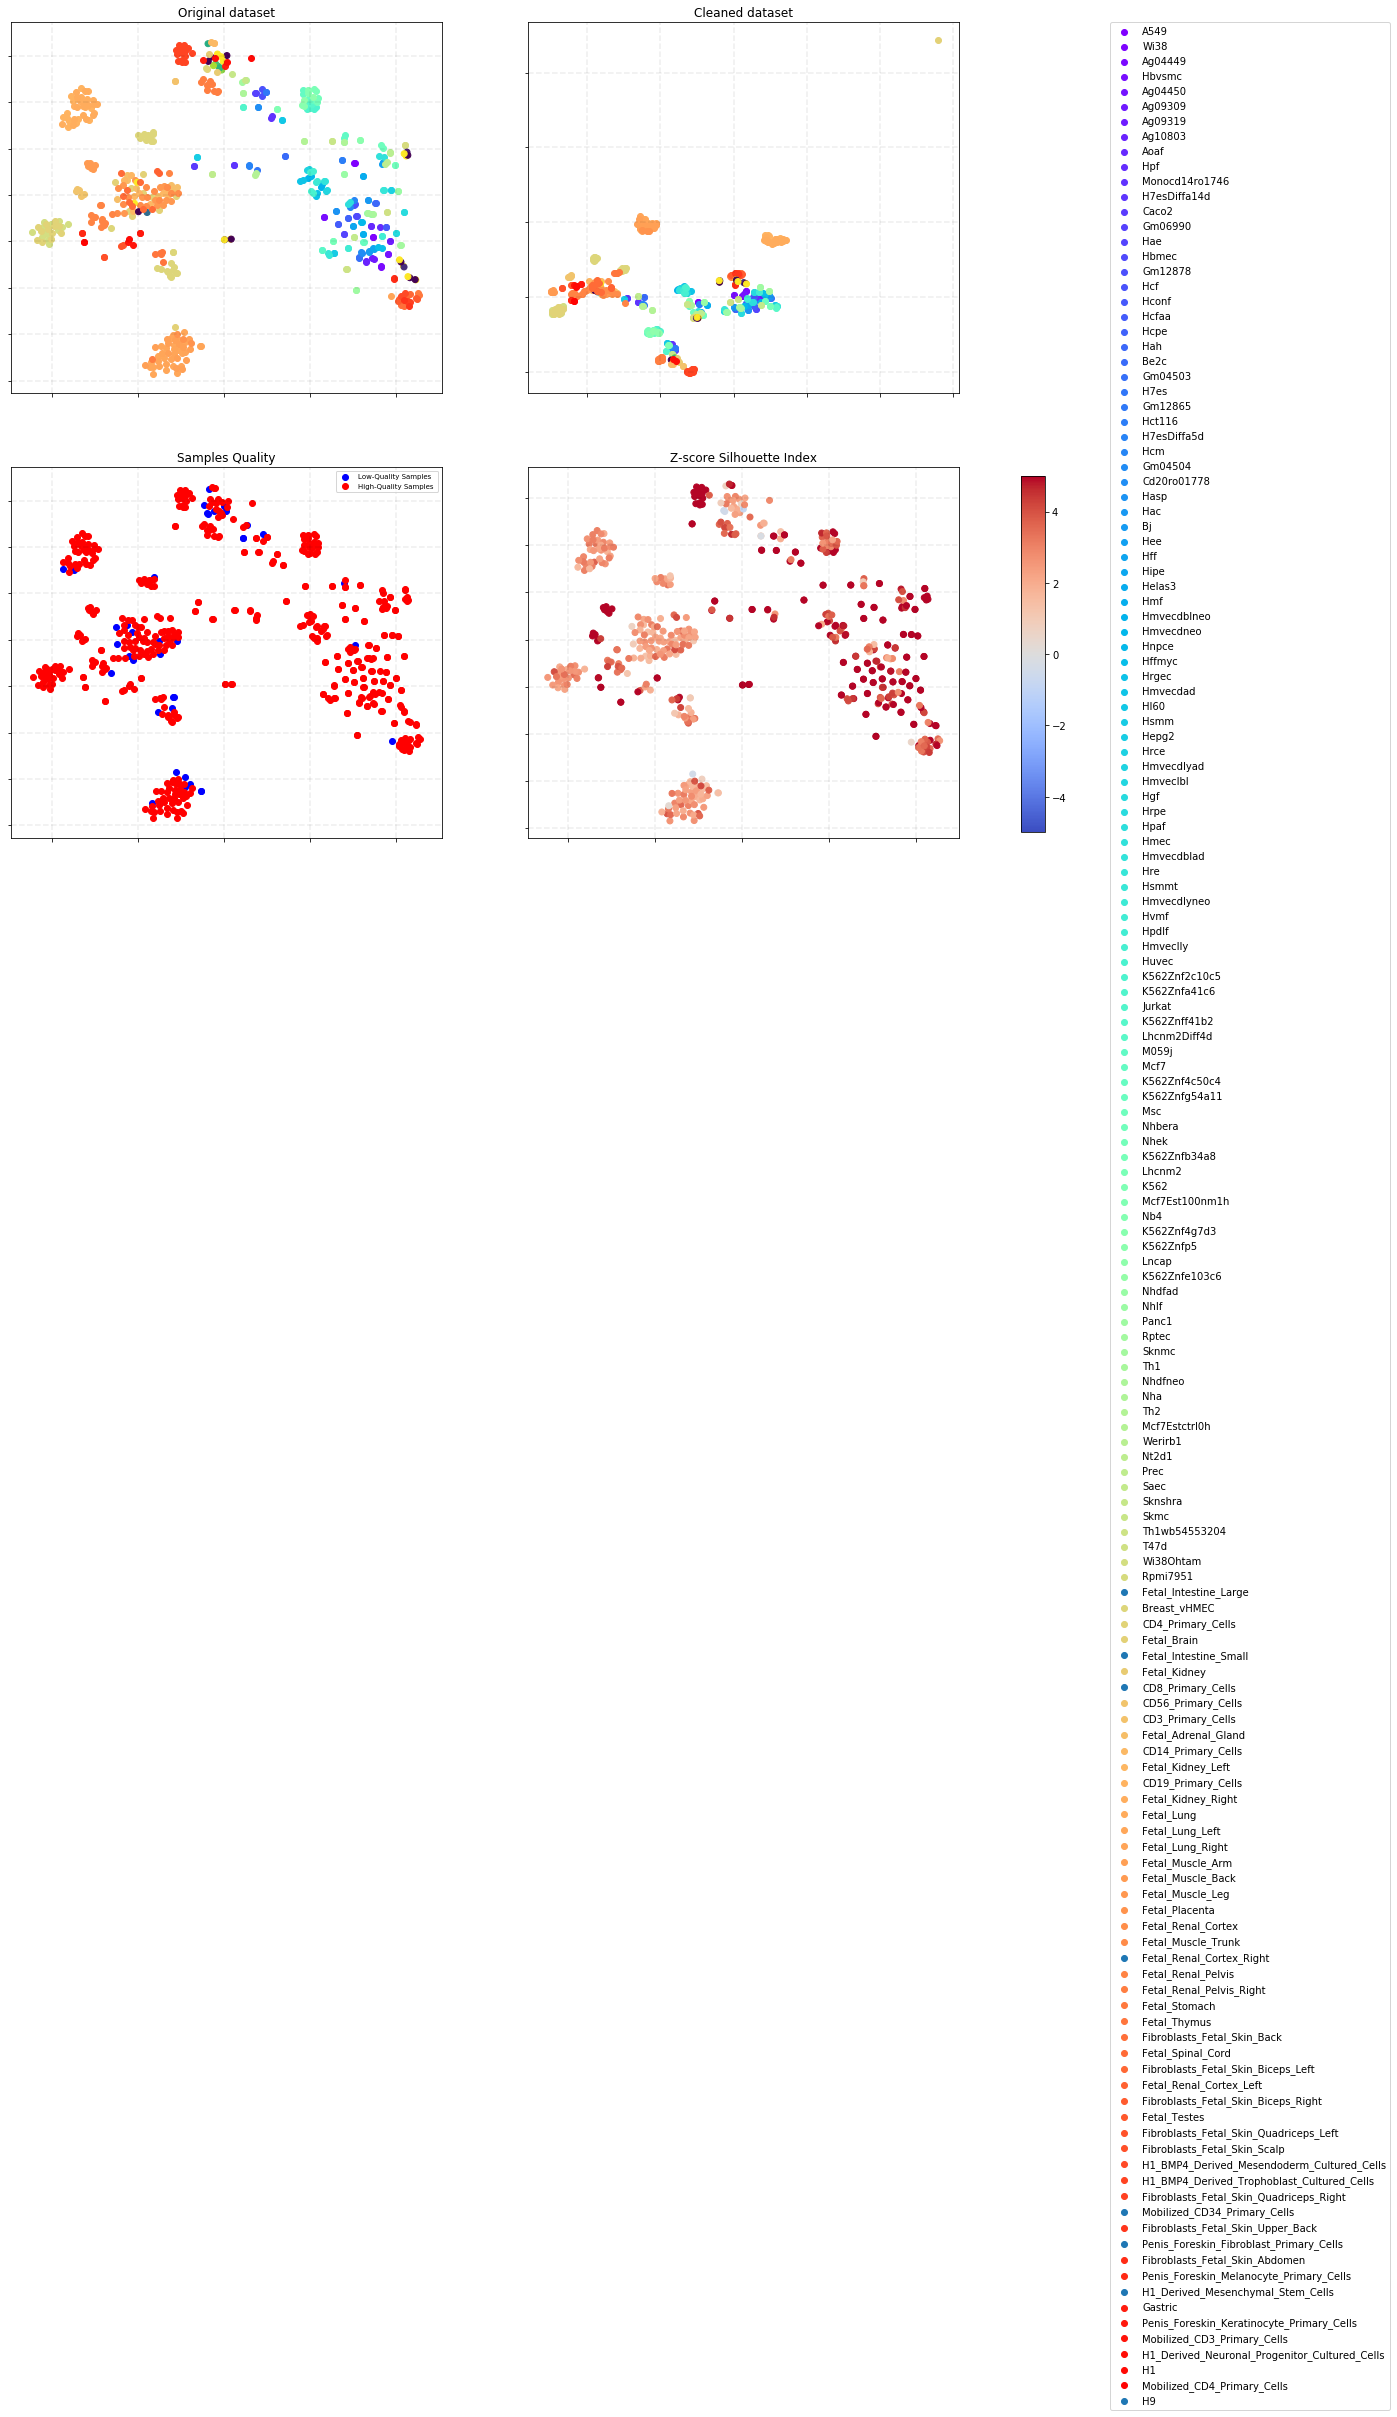

In [223]:
IdxGoodSamplesE = qt.compute_samples_quality(Tz=1.65,NR=100,names=namesCT,PCA='None',Distance='Jaccard',Kernel='None')
qt.display_samples_quality(Suffix='_DNASeBinary_N-J-N_TSNE',DR='TSNE',names=namesCT)
SilZJ = qt.SilZ 

In [278]:
print np.sum(np.logical_and(SilZY>1.65,SilZRT<=1.65))
print len(SilZY)
print np.sum(np.logical_and(SilZY>1.65,SilZRT<=1.65))/float(len(SilZY))*100

33
239
13.8075313808


In [293]:
sils = {'SilZL2':SilZL2,'SilZC':SilZC,'SilZY':SilZY,'SilZRT':SilZRT,'SilZE':SilZE}
silmat = np.zeros((len(sils),len(sils)))
for ix,Sx in enumerate(sils.keys()):
    for iy,Sy in enumerate(sils.keys()):
        silmat[ix,iy] = np.sum(np.logical_and(sils[Sx]>1.65,sils[Sy]<=1.65))/float(len(sils[Sy]))*100
        print Sx,Sy,silmat[ix,iy]
        
print sils.keys()
print silmat

SilZRT SilZRT 0.0
SilZRT SilZC 6.69456066946
SilZRT SilZY 9.2050209205
SilZRT SilZL2 0.836820083682
SilZRT SilZE 1.25523012552
SilZC SilZRT 12.5523012552
SilZC SilZC 0.0
SilZC SilZY 17.1548117155
SilZC SilZL2 12.9707112971
SilZC SilZE 10.8786610879
SilZY SilZRT 17.9916317992
SilZY SilZC 20.0836820084
SilZY SilZY 0.0
SilZY SilZL2 16.7364016736
SilZY SilZE 15.0627615063
SilZL2 SilZRT 1.67364016736
SilZL2 SilZC 7.94979079498
SilZL2 SilZY 8.78661087866
SilZL2 SilZL2 0.0
SilZL2 SilZE 1.67364016736
SilZE SilZRT 5.85774058577
SilZE SilZC 9.62343096234
SilZE SilZY 10.8786610879
SilZE SilZL2 5.43933054393
SilZE SilZE 0.0
['SilZRT', 'SilZC', 'SilZY', 'SilZL2', 'SilZE']
[[  0.           6.69456067   9.20502092   0.83682008   1.25523013]
 [ 12.55230126   0.          17.15481172  12.9707113   10.87866109]
 [ 17.9916318   20.08368201   0.          16.73640167  15.06276151]
 [  1.67364017   7.94979079   8.78661088   0.           1.67364017]
 [  5.85774059   9.62343096  10.87866109   5.43933054   0.  

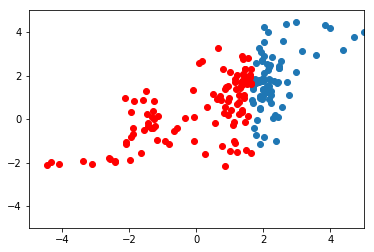

In [274]:
#plt.plot(SilZC,SilZY,'o')
idxb = np.where(SilZY<=1.65)[0]
idx = np.where(SilZY>1.65)[0]
plt.plot(SilZY[idx],SilZRT[idx],'o')
plt.plot(SilZY[idxb],SilZRT[idxb],'or')
plt.xlim(xmin=-5,xmax=5)
plt.ylim(ymin=-5,ymax=5)
plt.show()

Remove sum outliers


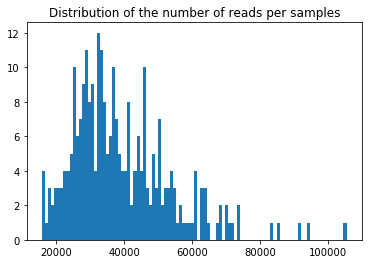

Lower threshold = 16043
Upper threshold = 87151
Number of removed samples = 4 / 269
Computing Distance matrix


perplexities:   0%|          | 0/8 [00:00<?, ?it/s]


# Dataset Total: 269
# Dataset Kept: 184 (68.4 %)
# Dataset Removed: 85 (31.6 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		1		2.26723656631		Cluster 0
2		12		4.96650653613		Cluster 2
4		4		3.26691030803		Cluster 4
6		6		7.03296609119		Cluster 6
7		1		2.71273192689		Cluster 7
8		3		6.37098270035		Cluster 8
9		5		1.78765778174		Cluster 9
10		12		2.86103980698		Cluster 10
11		10		2.58694686647		Cluster 11
12		7		1.88898316914		Cluster 12
13		12		2.5643929965		Cluster 13
14		8		2.17933588751		Cluster 14
15		7		2.08667368018		Cluster 15
16		6		7.95950531888		Cluster 16
17		10		2.01273337142		Cluster 17
18		3		3.36420079024		Cluster 18
19		3		2.42157755373		Cluster 19
20		10		2.63404898383		Cluster 20
21		2		1.86336147293		Cluster 21
22		13		4.89900802689		Cluster 22
23		10		4.35487246746		Cluster 23
24		5		5.79806102778		Cluster 24
25		5		2.26285011392		Cluster 25
26		14		6.53255298642		Cluster 26
27		3		6.78220531059		Cluster 27
28		4		8.00655913225		Cluster 28
29		4	


learning rates: 100%|██████████| 3/3 [02:36<00:00, 52.22s/it]


In [209]:
#Stand-alone Quality Tester
qt = QT.QualityTester()
IdxGoodSamples = qt.compute_samples_quality(matrix=matrix,labels=labels,NR=100,Tz=1.65,PCA='None',Distance='Yule',Kernel='None')
XY = QT.OptimalTSNE(qt.OptimalDistance,qt.labels)

Remove outliers defined by anomalous number of reads


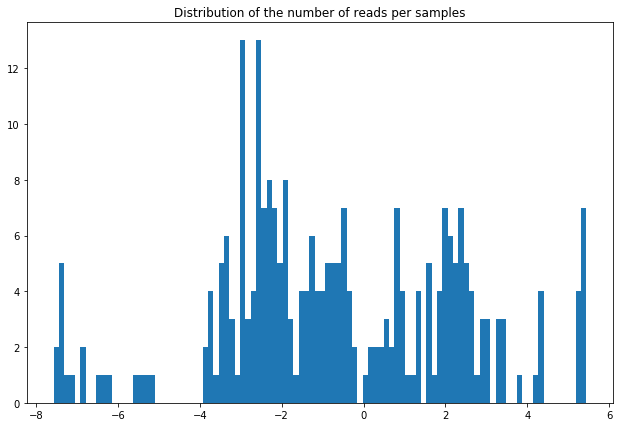

Lower threshold = 0
Upper threshold = 5
Number of removed samples = 173 / 265

Testing all distances:

None
	City Block
		None
			Connectivity: 0.169931344549
			Silhouette: 0.284386988474
		Sigmoid Kernel
			Connectivity: 0.23361014975
Input contains NaN, infinity or a value too large for dtype('float64').
		Exponential Kernel
			Connectivity: 0.23361014975
Input contains NaN, infinity or a value too large for dtype('float64').
		Cosine Kernel
			Connectivity: 0.199302045847
			Silhouette: -0.109235726589
	Cosine
		None
			Connectivity: 0.171621656883
			Silhouette: 0.124146
		Sigmoid Kernel
			Connectivity: 0.23361014975
Input contains NaN, infinity or a value too large for dtype('float32').
		Exponential Kernel
			Connectivity: 0.23361014975
Input contains NaN, infinity or a value too large for dtype('float32').
		Cosine Kernel
			Connectivity: 0.198139220924
			Silhouette: -0.109439
	Euclidean
		None
			Connectivity: 0.170047506521
			Silhouette: 0.284972
		Sigmoid Kernel


../QualityTester.py:842: RuntimeWarning: Mean of empty slice.
  ClusterCenter = [CoordMat[idx,:].mean(axis=0) for idx in idx_labels]
../QualityTester.py:825: RuntimeWarning: Mean of empty slice.
  dist_intra[i] = d.mean()


			Connectivity: 0.23361014975
Input contains NaN, infinity or a value too large for dtype('float32').
		Exponential Kernel
			Connectivity: 0.23361014975
Input contains NaN, infinity or a value too large for dtype('float32').
		Cosine Kernel
			Connectivity: 0.20008454921
			Silhouette: -0.109375
	L2
		None
			Connectivity: 0.170047506521
			Silhouette: 0.284972
		Sigmoid Kernel
			Connectivity: 0.23361014975
Input contains NaN, infinity or a value too large for dtype('float32').
		Exponential Kernel
			Connectivity: 0.23361014975
Input contains NaN, infinity or a value too large for dtype('float32').
		Cosine Kernel
			Connectivity: 0.20008454921
			Silhouette: -0.109375
	Bray Curtis
		None
			Connectivity: 0.16974205834
			Silhouette: 0.297427961952
		Sigmoid Kernel
			Connectivity: 0.23361014975
Input contains NaN, infinity or a value too large for dtype('float64').
		Exponential Kernel
			Connectivity: 0.23361014975
Input contains NaN, infinity or a value too large for dtype('floa

In [215]:
qtXY = QT.QualityTester()
qtXY.get_optimal_distance(XY,qt.labels)

In [226]:
np.unique(qtXY.labels[qtXY.IdxGoodSamples],return_counts=True)

(array([ 1,  3,  5,  6,  8, 13, 14, 15, 16, 18, 23, 26, 28]),
 array([11,  1,  1,  6,  3, 14, 10, 11,  6,  3,  1, 13,  4]))

In [225]:
qtXY.compute_samples_quality(NR=100,Tz=1.65)


Using Optimal (PCA,Distance,Kernel) = ('None', 'Bray Curtis', 'None')

# Dataset Total: 265
# Dataset Kept: 84 (31.7 %)
# Dataset Removed: 181 (68.3 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name


IndexError: index 13 is out of bounds for axis 1 with size 13

In [222]:
qtXY.SilZClust

array([ 3.89263162,  3.17974875,  2.01579841,  6.05013807,  4.98910065,
        2.79345239,  2.67054124,  2.64842199,  5.34040796,  2.13810202,
        2.57640341,  5.69832225,  5.27147483])

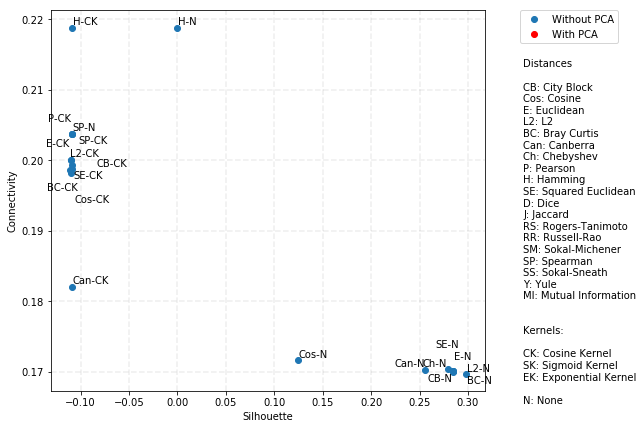

In [218]:
qtXY.displayNamesScatter(Suffix='_DNASeBinary_Yule_TSNE',ImgSize=7)

In [223]:
XY = QT.OptimalTSNE(qtXY.OptimalDistance,qtXY.labels)

learning rates: 100%|██████████| 3/3 [00:52<00:00, 17.55s/it]


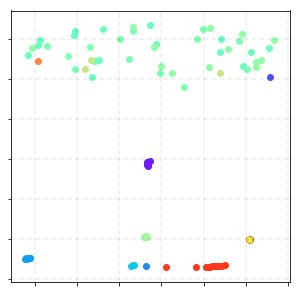

In [224]:
from matplotlib.pyplot import cm

f,ax = plt.subplots(1,1,figsize=(5,5))

color=cm.rainbow(np.linspace(0,1,max(qtXY.labels)+1))
for l in np.unique(qtXY.labels):
    ax.scatter(XY[qtXY.labels==l,0],XY[qtXY.labels==l,1],c=color[l])

#ax[0,1].scatter(XY[self.IdxGoodSamples,0],XY[self.IdxGoodSamples,1],c=self.labels[self.IdxGoodSamples],cmap='rainbow')

ax.grid(color='k',linestyle='--',linewidth=0.1)
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

In [219]:
qtXY.display_samples_quality(Suffix='_DNASeBinary_Jaccard',Save=False,DR='MDS',names=namesCT)

Launch "compute_samples_quality" first !


ValueError: 

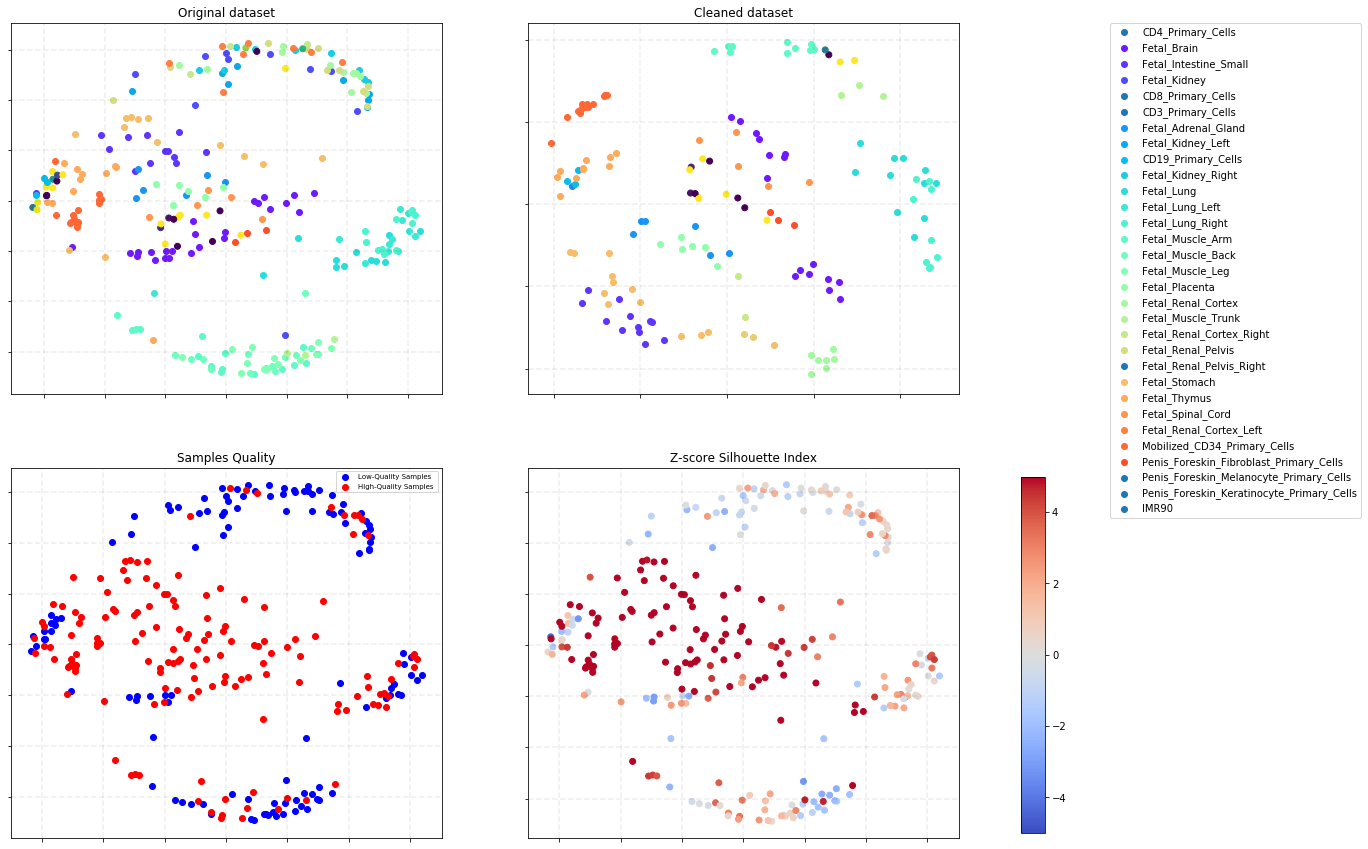

In [202]:
qt.display_samples_quality(Suffix='_DNASeBinary_Jaccard',DR='MDS',names=namesCT)

In [191]:
Distmat = qt.OptimalDistance[np.ix_(qt.IdxGoodSamples,qt.IdxGoodSamples)]
labelsC = qt.labels[qt.IdxGoodSamples]

In [192]:
from sklearn import manifold
from sklearn.metrics.pairwise import pairwise_distances

learning_rate = 100
perplexity = 100

model_tsne = manifold.TSNE(n_components=2, random_state=3,perplexity=perplexity,
                                       early_exaggeration=4.0, learning_rate=learning_rate,
                                       n_iter=100000, metric='precomputed')

XY = model_tsne.fit_transform(Distmat)

In [193]:
distmatTSNE = pairwise_distances(XY,metric='cosine')
print QT.Silhouette(distmatTSNE,labelsC)

-0.444341


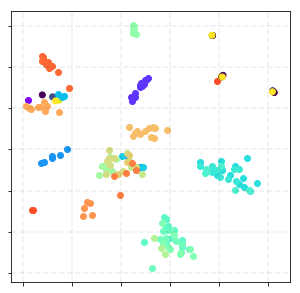

In [201]:
from matplotlib.pyplot import cm

f,ax = plt.subplots(1,1,figsize=(5,5))

color=cm.rainbow(np.linspace(0,1,max(labelsC)+1))
for l in np.unique(labelsC):
    ax.scatter(XY[labelsC==l,0],XY[labelsC==l,1],c=color[l])

#ax[0,1].scatter(XY[self.IdxGoodSamples,0],XY[self.IdxGoodSamples,1],c=self.labels[self.IdxGoodSamples],cmap='rainbow')

ax.grid(color='k',linestyle='--',linewidth=0.1)
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

In [59]:
qt.Res['Silhouette']

{'None-Bray Curtis-Cosine Kernel': -0.17201828439287078,
 'None-Bray Curtis-Exponential Kernel': 0.058358772109523581,
 'None-Bray Curtis-None': 0.059089513633565204,
 'None-Bray Curtis-Sigmoid Kernel': -0.18972604476675139,
 'None-Canberra-Cosine Kernel': -0.17254014405378321,
 'None-Canberra-Exponential Kernel': 0.0,
 'None-Canberra-None': 0.018313866523731532,
 'None-Canberra-Sigmoid Kernel': -0.17142886432619525,
 'None-Chebyshev-Cosine Kernel': -0.17142736408838818,
 'None-Chebyshev-Exponential Kernel': -4.229387979828729e-16,
 'None-Chebyshev-None': 0.0,
 'None-Chebyshev-Sigmoid Kernel': -0.1794941742400272,
 'None-City Block-Cosine Kernel': -0.17254014405378321,
 'None-City Block-Exponential Kernel': 0.0,
 'None-City Block-None': 0.018313866523731532,
 'None-City Block-Sigmoid Kernel': -0.17142886450352679,
 'None-Cosine-Cosine Kernel': -0.1720234901328935,
 'None-Cosine-Exponential Kernel': 0.066357203746693058,
 'None-Cosine-None': 0.067223448686757573,
 'None-Cosine-Sigmoid K

In [53]:
qt.SortedPDKkey

array(['None-Yule-Exponential Kernel', 'None-Yule-None',
       'None-Pearson-None', 'None-Pearson-Exponential Kernel',
       'None-Spearman-None', 'None-Cosine-None',
       'None-Spearman-Exponential Kernel', 'PCA-Cosine-Exponential Kernel',
       'PCA-Pearson-None', 'PCA-Pearson-Exponential Kernel',
       'PCA-Cosine-None', 'None-Cosine-Exponential Kernel',
       'None-Dice-None', 'None-Dice-Exponential Kernel',
       'None-Bray Curtis-None', 'None-Bray Curtis-Exponential Kernel',
       'None-Jaccard-Exponential Kernel', 'None-Sokal Sneath-None',
       'None-Jaccard-None', 'PCA-Squared Euclidean-None',
       'None-Sokal Sneath-Exponential Kernel',
       'PCA-Bray Curtis-Exponential Kernel', 'PCA-L2-None',
       'PCA-Bray Curtis-None', 'PCA-Euclidean-None',
       'None-Mutual Information-Sigmoid Kernel', 'PCA-City Block-None',
       'PCA-Squared Euclidean-Exponential Kernel',
       'None-Sokal Michener-Exponential Kernel',
       'None-Sokal Michener-None', 'PCA-Chebyshe

In [55]:
IdxGoodSamples = qt.compute_samples_quality(Tz=0,names=namesCT,Distance='Euclidean',Kernel='None',PCA='None')

Computing Distance matrix

# Dataset Total: 620
# Dataset Kept: 303 (48.9 %)
# Dataset Removed: 317 (51.1 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		2		6.42700238644		Breast_vHMEC
1		4		1.98029045106		CD4_Primary_Cells
2		21		1.34055666433		Fetal_Brain
3		12		3.60334206294		Fetal_Intestine_Small
4		10		0.852924700502		Fetal_Kidney
5		4		2.19271479992		CD8_Primary_Cells
6		2		2.66820351587		CD56_Primary_Cells
7		4		1.84957629869		CD3_Primary_Cells
8		6		4.62218243751		Fetal_Adrenal_Gland
9		2		6.11166927591		CD14_Primary_Cells
10		7		1.11510941655		Fetal_Kidney_Left
11		3		4.73371336442		CD19_Primary_Cells
12		9		1.79307105516		Fetal_Kidney_Right
13		12		3.13635534322		Fetal_Lung
14		12		1.82764524513		Fetal_Lung_Left
15		11		1.6795844397		Fetal_Lung_Right
16		16		2.72558177207		Fetal_Muscle_Arm
17		12		2.39647952083		Fetal_Muscle_Back
18		14		1.88278124353		Fetal_Muscle_Leg
19		6		4.83709287309		Fetal_Placenta
20		11		1.95530576348		Fetal_Renal_Cortex
21		3		2.40

learning rates: 100%|██████████| 3/3 [03:18<00:00, 66.06s/it]


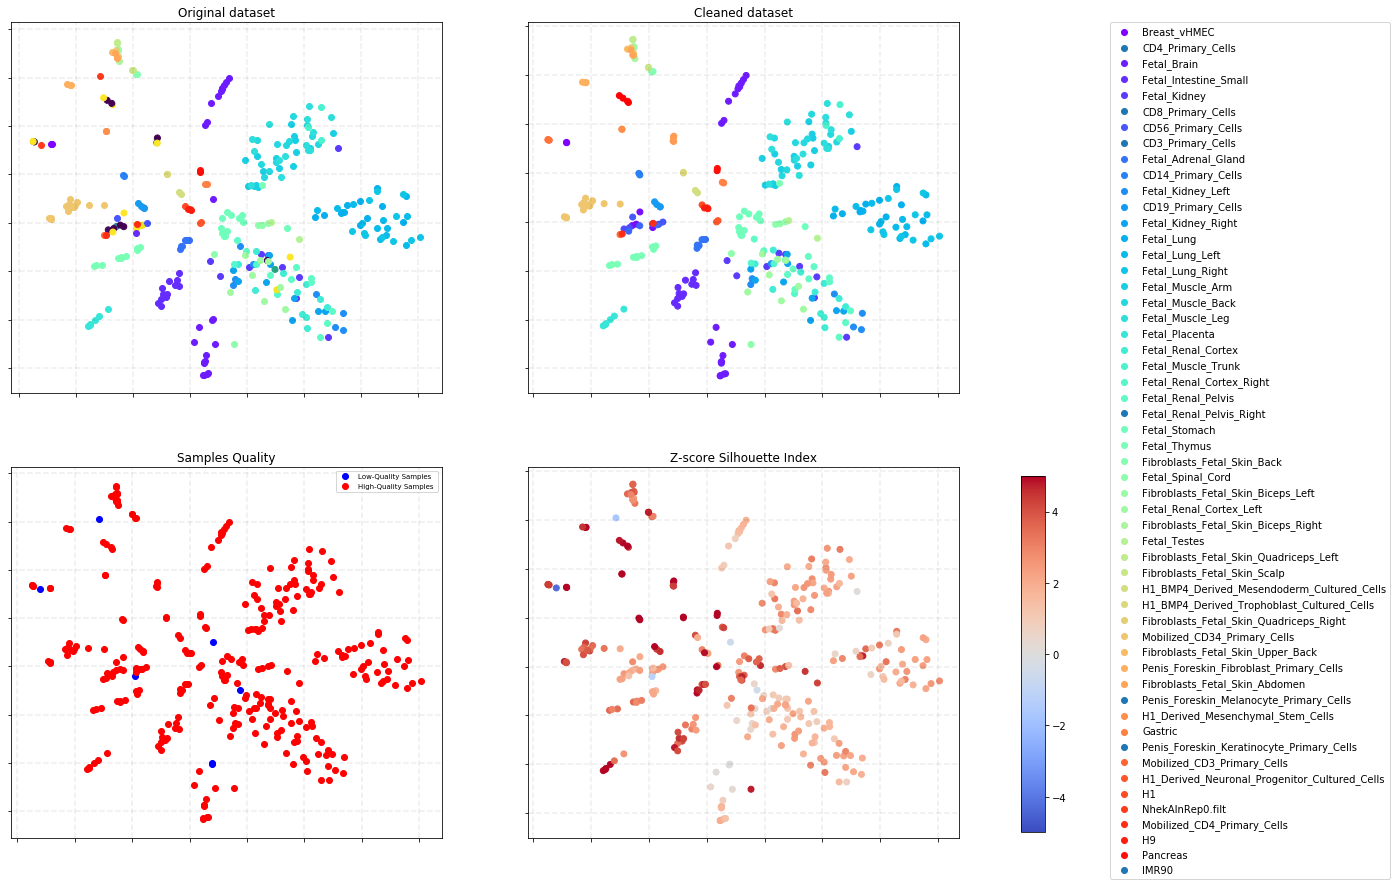

In [56]:
qt.display_samples_quality(Suffix='_DNASeBinary-None-Euclidean-None',DR='TSNE',names=namesCT)

In [ ]:
qt.display_samples_quality(Suffix='_DNASeBinary-J-N',DR='TSNE',names=namesCT,Distance='J',Kernel='N',PCA='None')

In [ ]:
Distmat = qt.computeDistanceMatrix(matrix[IdxGoodSamples,:],labels,PCA='None',Distance='Pearson',Kernel='None')
XY = QT.OptimalTSNE(Distmat,labels)

In [ ]:
f,ax = plt.subplots(1,1,figsize=(15,10))
color=cm.rainbow(np.linspace(0,1,max(labels)+1))
for l in np.unique(labels):
    ax.scatter(XY[labels==l,0],XY[labels==l,1],c=color[l],label=names[l])

lgd = ax.legend(names,bbox_to_anchor=(2.55, 1), loc=2, borderaxespad=0.)

ax.set_title('Original dataset')
ax.grid(color='k',linestyle='--',linewidth=0.1)
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.show()